# Khai báo thư viện và nhập dữ liệu

In [1]:
# Nhập thư viện
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score



# EDA

In [2]:
file_path = r'D:\Download\HR Employee data.csv\HR Employee data.csv'
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13423 entries, 0 to 13422
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                13423 non-null  int64  
 1   JoiningYear               13423 non-null  int64  
 2   Age                       13423 non-null  int64  
 3   BusinessTravel            13423 non-null  object 
 4   DailyRate                 13423 non-null  int64  
 5   Department                13423 non-null  object 
 6   DistanceFromHome          13423 non-null  int64  
 7   EducationField            13423 non-null  object 
 8   EmployeeCount             13423 non-null  int64  
 9   EmployeeNumber            13423 non-null  int64  
 10  EnvironmentSatisfaction   13423 non-null  int64  
 11  Gender                    13423 non-null  object 
 12  HourlyRate                13423 non-null  int64  
 13  JobInvolvement            13423 non-null  int64  
 14  JobSat

In [3]:
df.head()

,EmployeeID,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,LeavingYear,Reason,RelievingStatus,office_code,JobLevel_updated
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,14,4,5,3,Yes,2019.0,long hours,Voluntary,BOS,L7
1,100001,2006,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,1,519,...,12,4,5,3,Yes,2018.0,medical issues,Voluntary,NYC,L6
2,100002,2006,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,1,1572,...,12,3,1,4,Yes,2018.0,retiring,Voluntary,OTT,L6
3,100003,2006,54,Travel_Rarely,215,Corporate Functions,19,Diploma,1,309,...,13,4,5,3,Yes,2019.0,career change,Voluntary,NYC,L7
4,100004,2007,57,Travel_Rarely,285,Marketing,2,Diploma,1,828,...,11,5,5,3,Yes,2018.0,retiring,Voluntary,CAL,L5


In [4]:
# Tính số lượng và tỷ lệ phần trăm giá trị thiếu
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Kết hợp số lượng và phần trăm giá trị thiếu thành DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# In ra danh sách các cột có giá trị thiếu
print(missing_summary)


                          Missing Values  Percentage (%)
Reason                             10225       76.175222
LeavingYear                        10225       76.175222
RelievingStatus                    10225       76.175222
BusinessTravel                         0        0.000000
EmployeeID                             0        0.000000
JoiningYear                            0        0.000000
Age                                    0        0.000000
DistanceFromHome                       0        0.000000
Department                             0        0.000000
DailyRate                              0        0.000000
EducationField                         0        0.000000
Gender                                 0        0.000000
EmployeeCount                          0        0.000000
EmployeeNumber                         0        0.000000
EnvironmentSatisfaction                0        0.000000
MaritalStatus                          0        0.000000
MonthlyIncome                  

In [5]:
# Kiểm tra dữ liệu trùng
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [EmployeeID, JoiningYear, Age, BusinessTravel, DailyRate, Department, DistanceFromHome, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, LeavingYear, Reason, RelievingStatus, office_code, JobLevel_updated]
Index: []

[0 rows x 39 columns]


In [6]:
df.describe()

,EmployeeID,JoiningYear,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,LeavingYear
count,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.0,13423.000000,13423.000000,13423.000000,13423.00000,...,13423.0,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,3198.000000
mean,106711.000000,2018.825300,36.159949,803.998287,8.881472,1.0,1022.222677,2.369366,65.498622,2.46316,...,80.0,0.500410,10.572227,2.454518,2.496908,2.791626,1.898979,1.396037,1.873501,2020.392120
std,3875.030667,2.005345,8.126696,356.968483,6.844715,0.0,549.883093,0.941861,17.196420,0.66039,...,0.0,0.664563,7.246988,1.069622,0.656888,1.860029,1.039347,0.818350,1.004282,1.420644
min,100000.000000,2005.000000,18.000000,102.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,...,80.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000
25%,103355.500000,2018.000000,30.000000,514.500000,3.000000,1.0,554.000000,2.000000,52.000000,2.00000,...,80.0,0.000000,6.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2019.000000
50%,106711.000000,2019.000000,35.000000,800.000000,7.000000,1.0,1014.000000,2.000000,65.000000,3.00000,...,80.0,0.000000,9.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2021.000000
75%,110066.500000,2020.000000,41.000000,1106.000000,13.000000,1.0,1493.000000,3.000000,79.000000,3.00000,...,80.0,1.000000,14.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2022.000000
max,113422.000000,2021.000000,60.000000,1499.000000,29.000000,1.0,2068.000000,4.000000,100.000000,4.00000,...,80.0,3.000000,40.000000,6.000000,4.000000,15.000000,7.000000,6.000000,6.000000,2022.000000


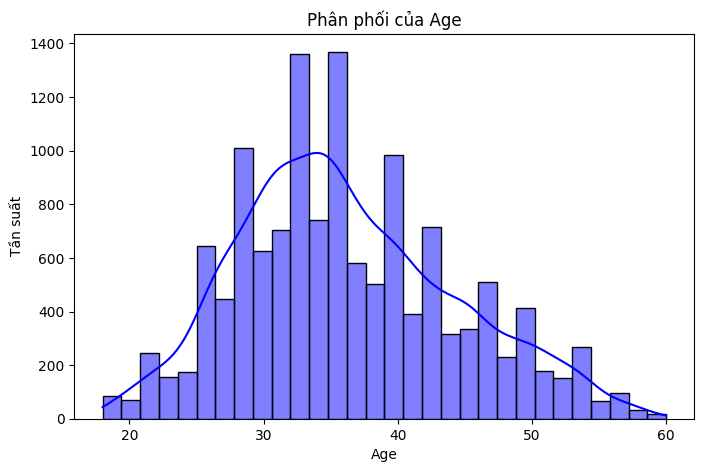

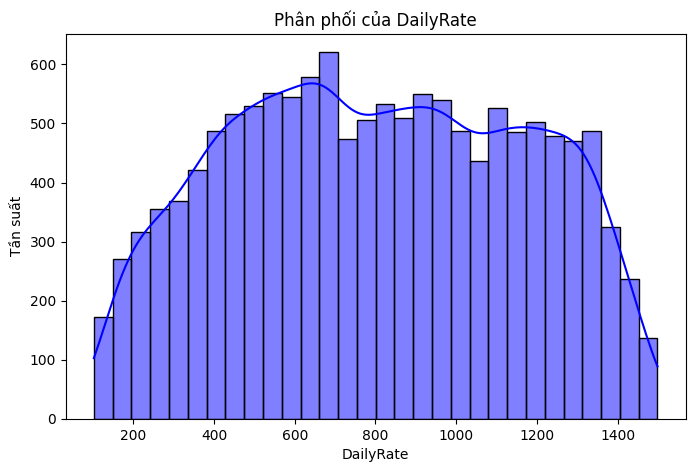

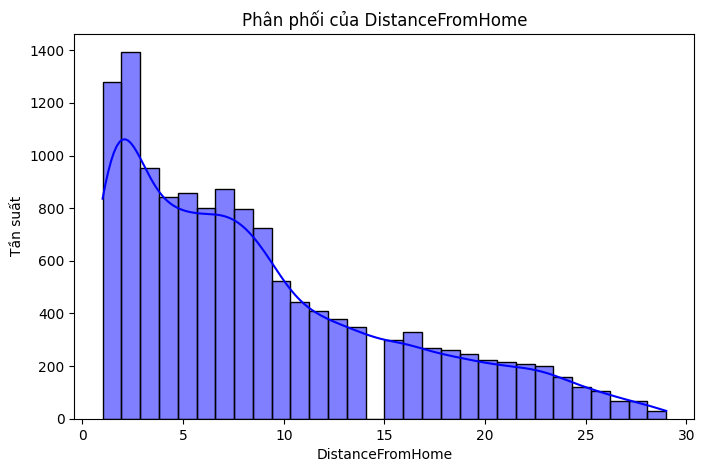

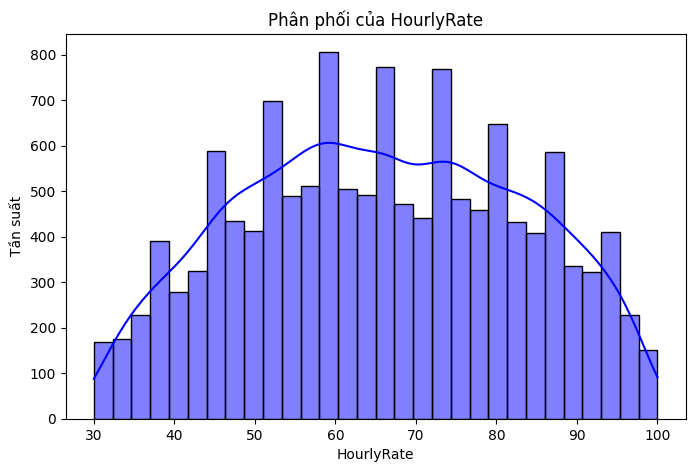

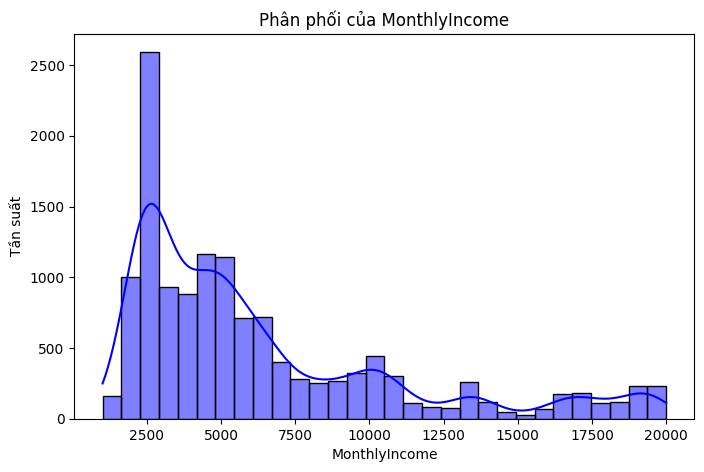

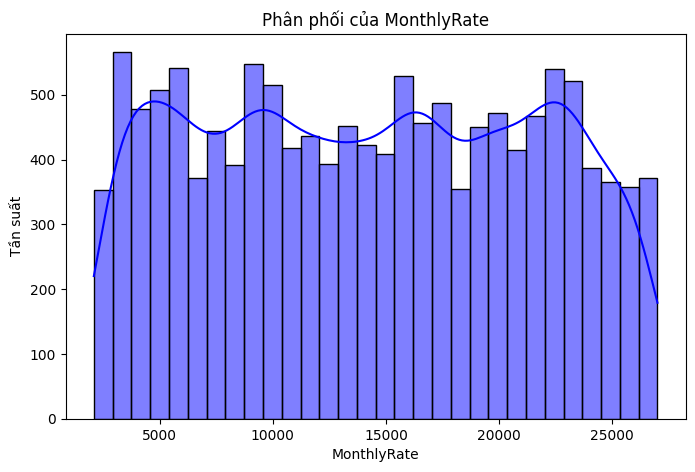

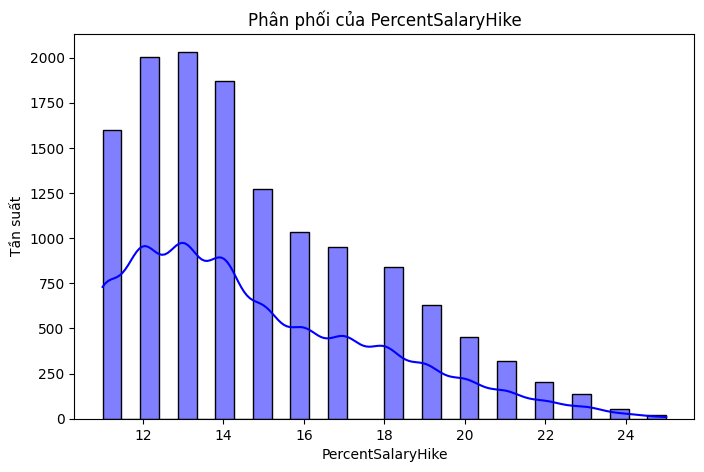

In [7]:
# Histogram cho các biến số liên tục
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
                     'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Phân phối của {col}')
    plt.xlabel(col)
    plt.ylabel('Tần suất')
    plt.show()


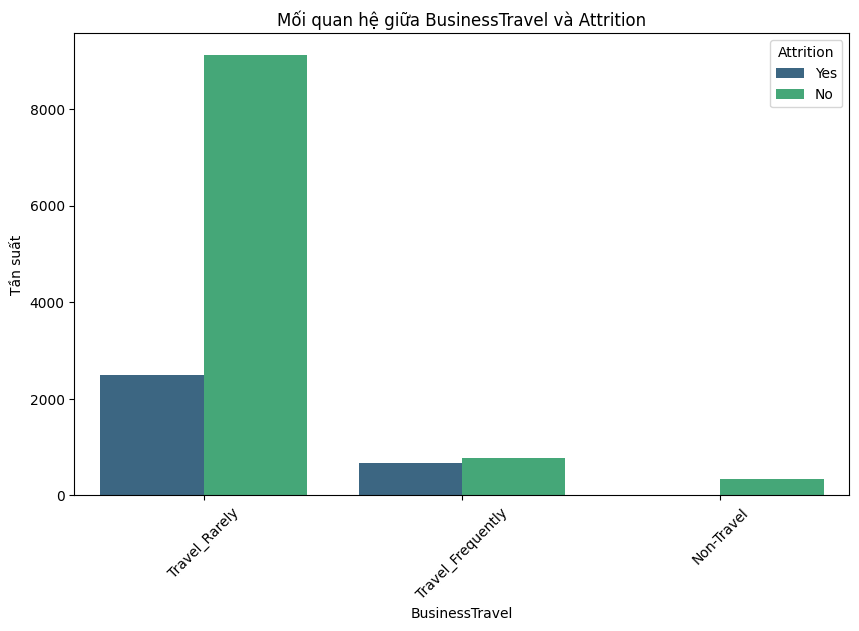

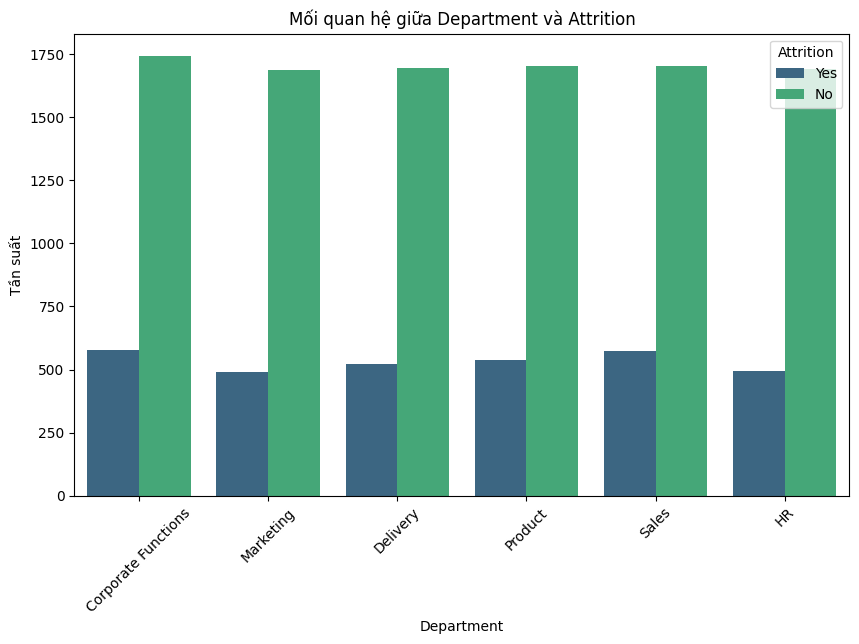

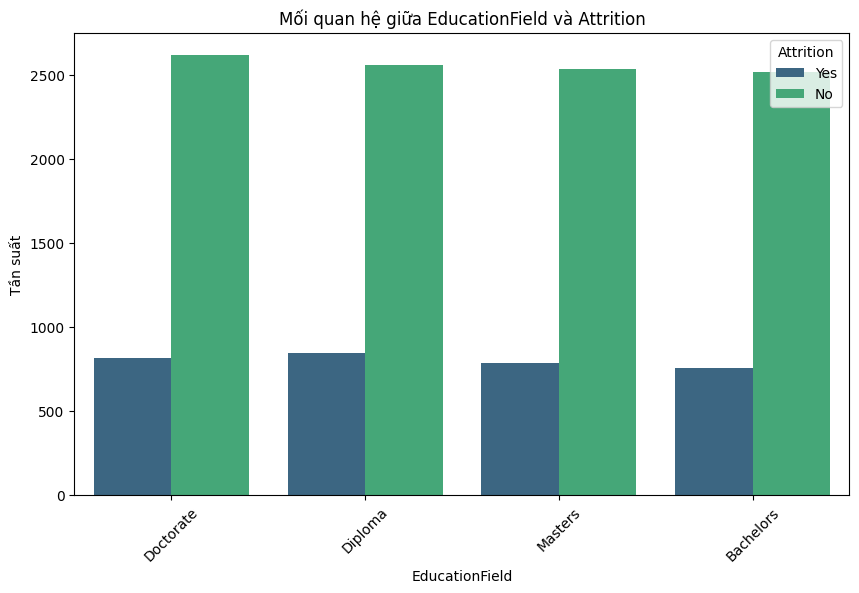

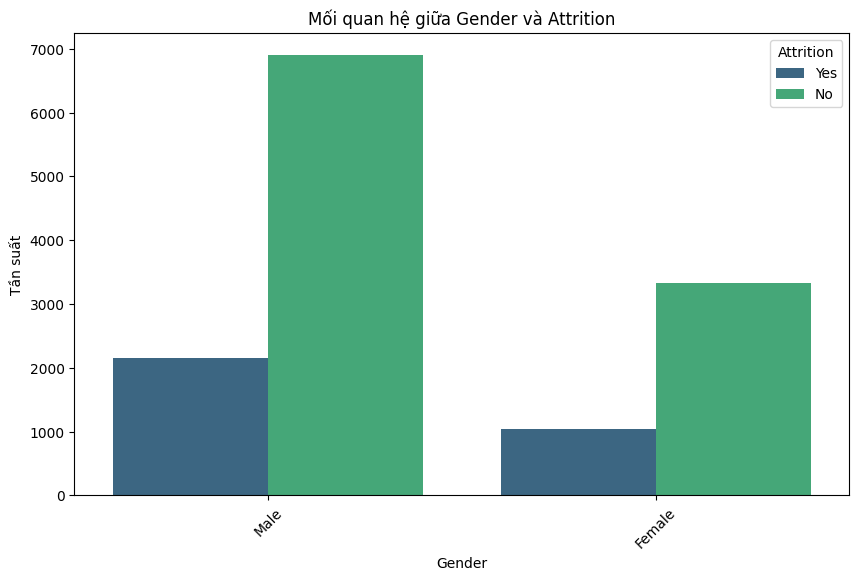

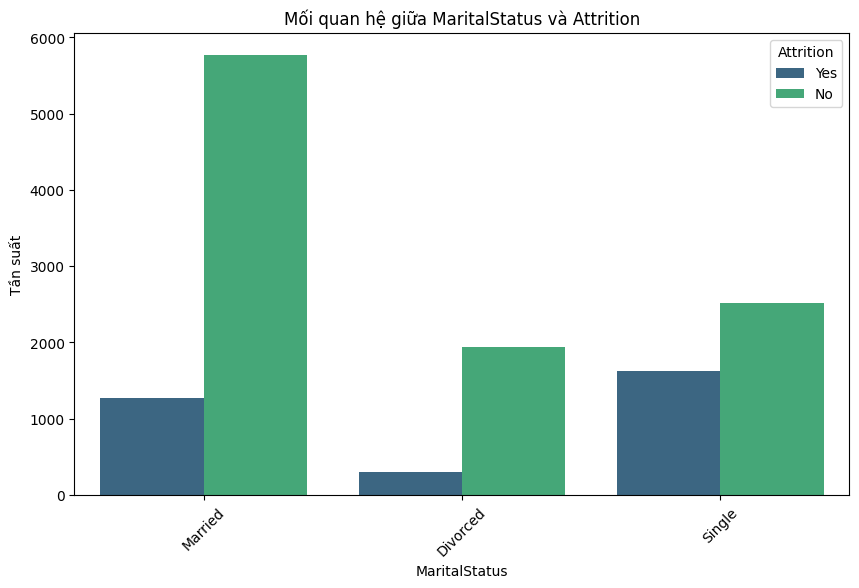

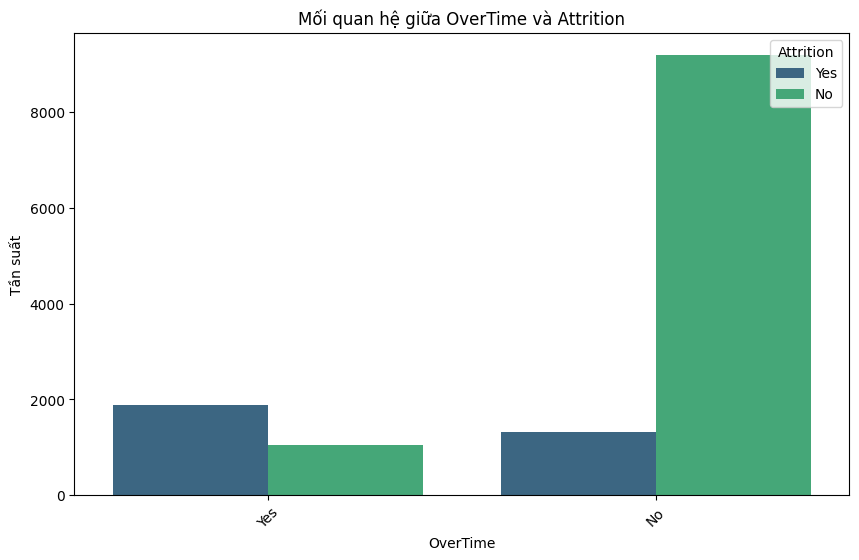

In [8]:
# Danh sách các biến phân loại
categorical_columns = ['BusinessTravel', 'Department', 'EducationField',
                       'Gender', 'MaritalStatus', 'OverTime']

# Vẽ countplot cho từng biến
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='Attrition', palette='viridis')
    plt.title(f'Mối quan hệ giữa {col} và Attrition')
    plt.xlabel(col)
    plt.ylabel('Tần suất')
    plt.xticks(rotation=45)
    plt.legend(title='Attrition', loc='upper right')
    plt.show()


C:\Users\HDC\AppData\Local\Temp\ipykernel_19696\1403947375.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='coolwarm')


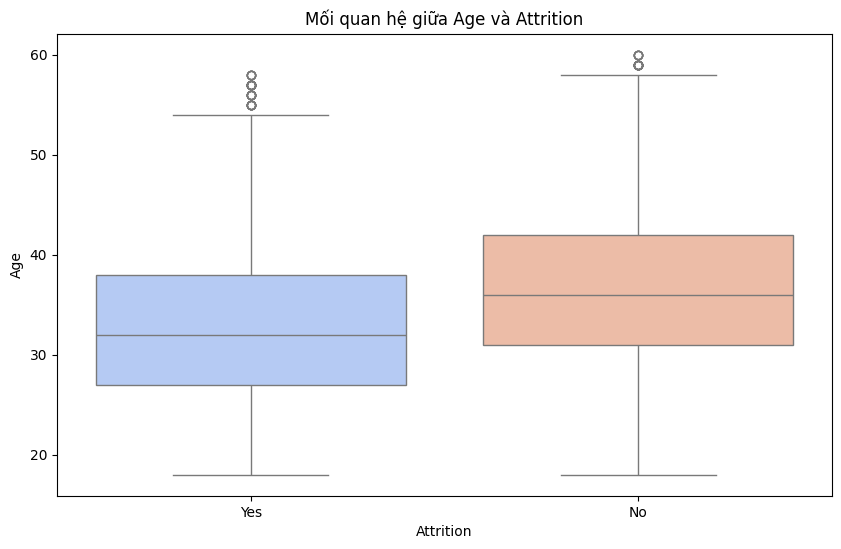

C:\Users\HDC\AppData\Local\Temp\ipykernel_19696\1403947375.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='coolwarm')


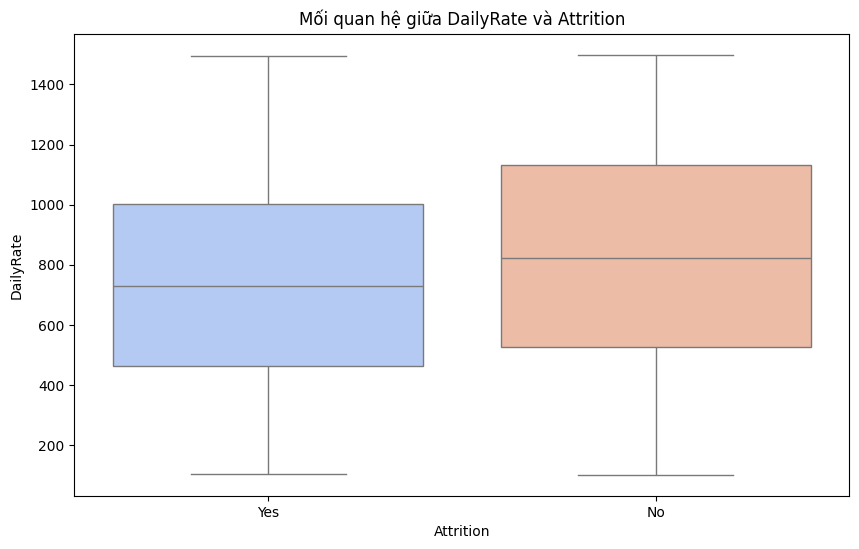

C:\Users\HDC\AppData\Local\Temp\ipykernel_19696\1403947375.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='coolwarm')


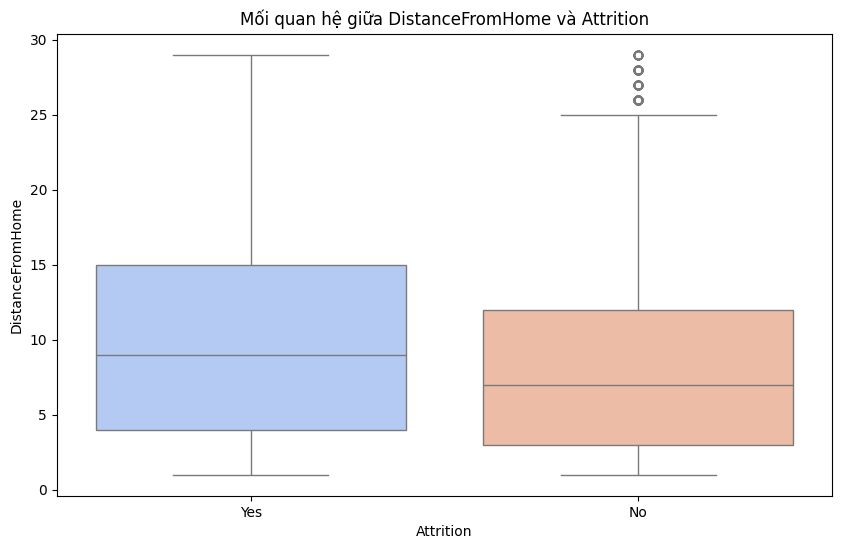

C:\Users\HDC\AppData\Local\Temp\ipykernel_19696\1403947375.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='coolwarm')


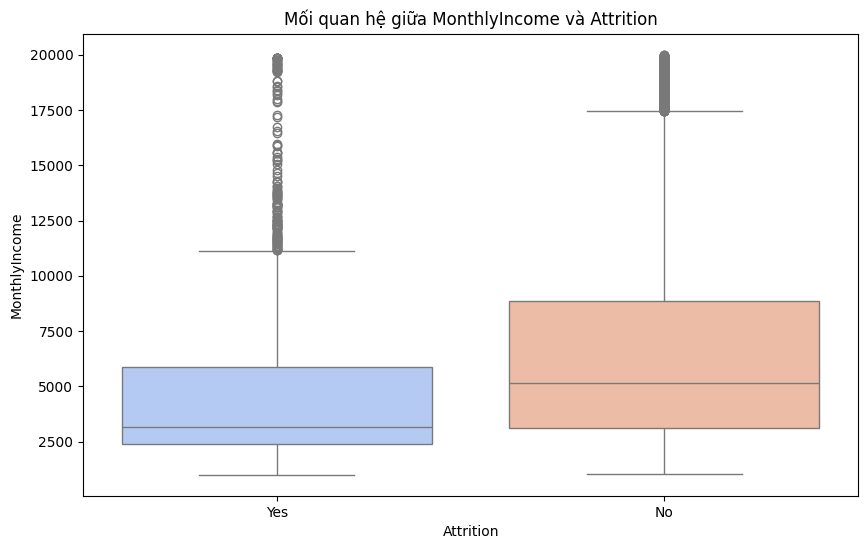

C:\Users\HDC\AppData\Local\Temp\ipykernel_19696\1403947375.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='coolwarm')


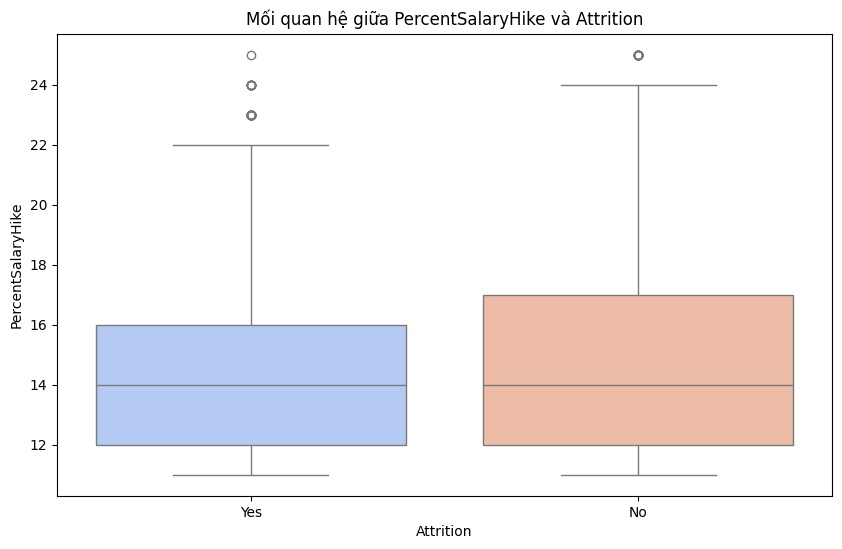

C:\Users\HDC\AppData\Local\Temp\ipykernel_19696\1403947375.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='coolwarm')


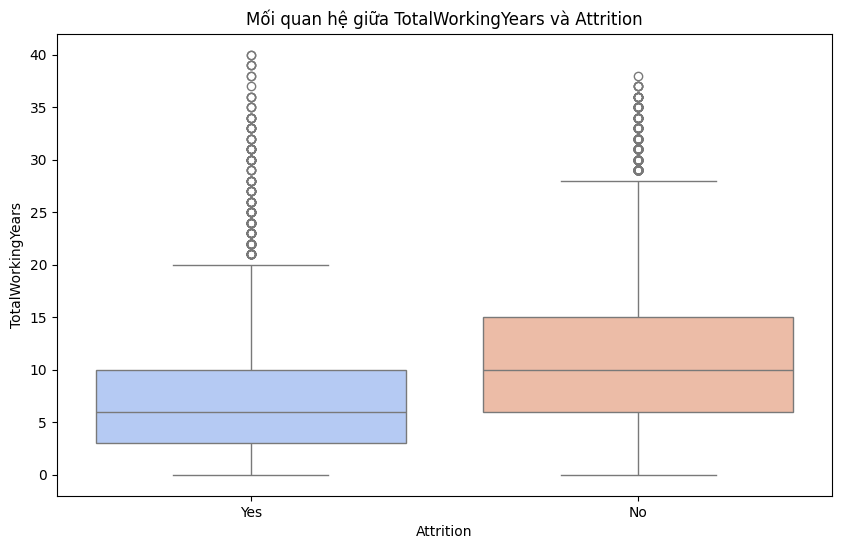

C:\Users\HDC\AppData\Local\Temp\ipykernel_19696\1403947375.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='coolwarm')


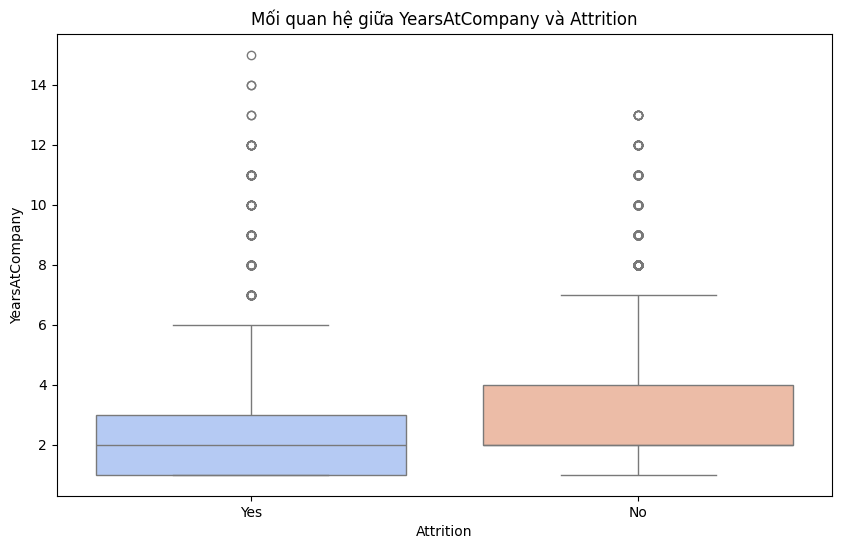

In [9]:
# Danh sách các biến số
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome',
                     'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany']

# Vẽ boxplot cho từng biến
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Attrition', y=col, palette='coolwarm')
    plt.title(f'Mối quan hệ giữa {col} và Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(col)
    plt.show()


# Tiền xử lý dữ liệu

Feature Selection 

In [10]:
# Loại bỏ cột không cần thiết
columns_to_drop = ['EmployeeID', 'EmployeeNumber', 'EmployeeCount', 'StandardHours', 
                   'Over18', 'office_code', 'RelievingStatus', 'Reason', 'JobLevel_updated',
                   'JoiningYear', 'LeavingYear']
df = df.drop(columns=columns_to_drop, axis=1)


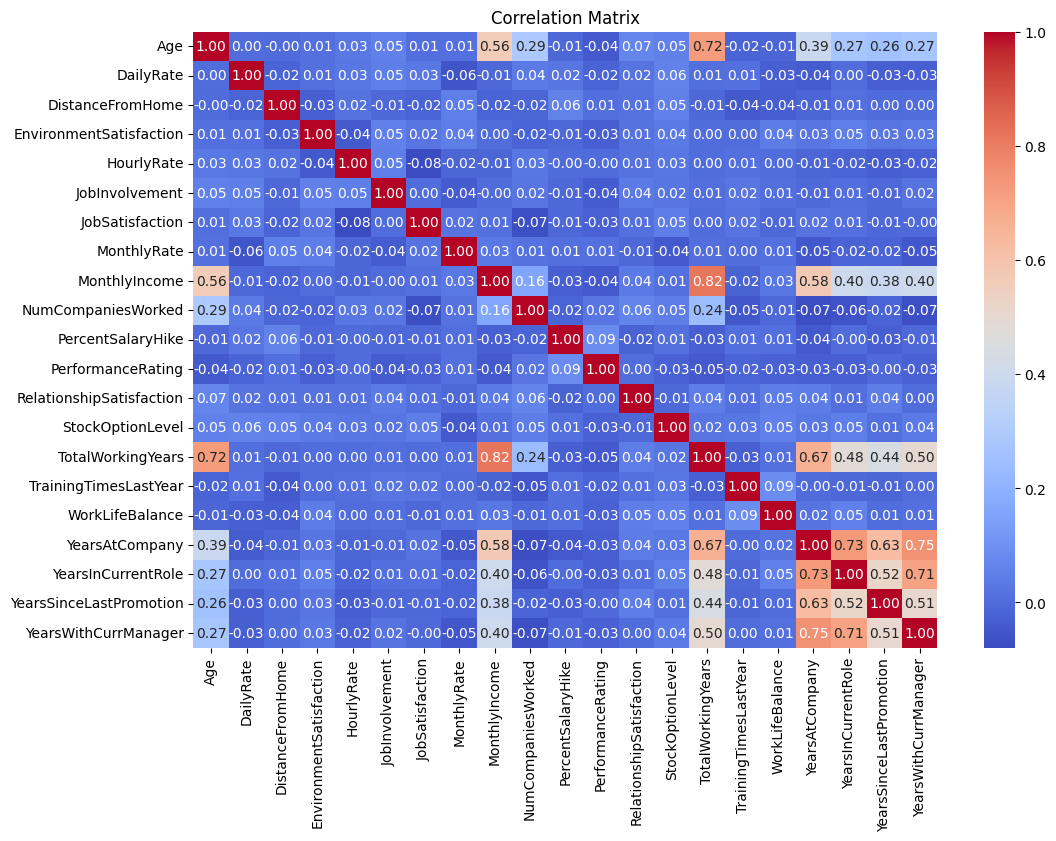

In [11]:
# Xem hệ số tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(df[['Age','DailyRate','DistanceFromHome','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobSatisfaction',
'MonthlyRate','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
'YearsWithCurrManager']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

=> Ta nhận thấy các cột có hệ số tương quan rất cao như TotalWorkingYears và Age (0.72), YearsAtComapny và YearsInCurrentRol (0.73), YearsAtCompany và YearsWithCurrManager (0.75) và MonthlyIncome và TotalWorkingYears (0.82)

In [12]:
# Loại bỏ cột có chỉ số tương quan cao
df = df.drop(columns=['Age', 'MonthlyIncome', 'YearsAtCompany','YearsInCurrentRole',
                      'YearsSinceLastPromotion','YearsWithCurrManager'], axis=1)


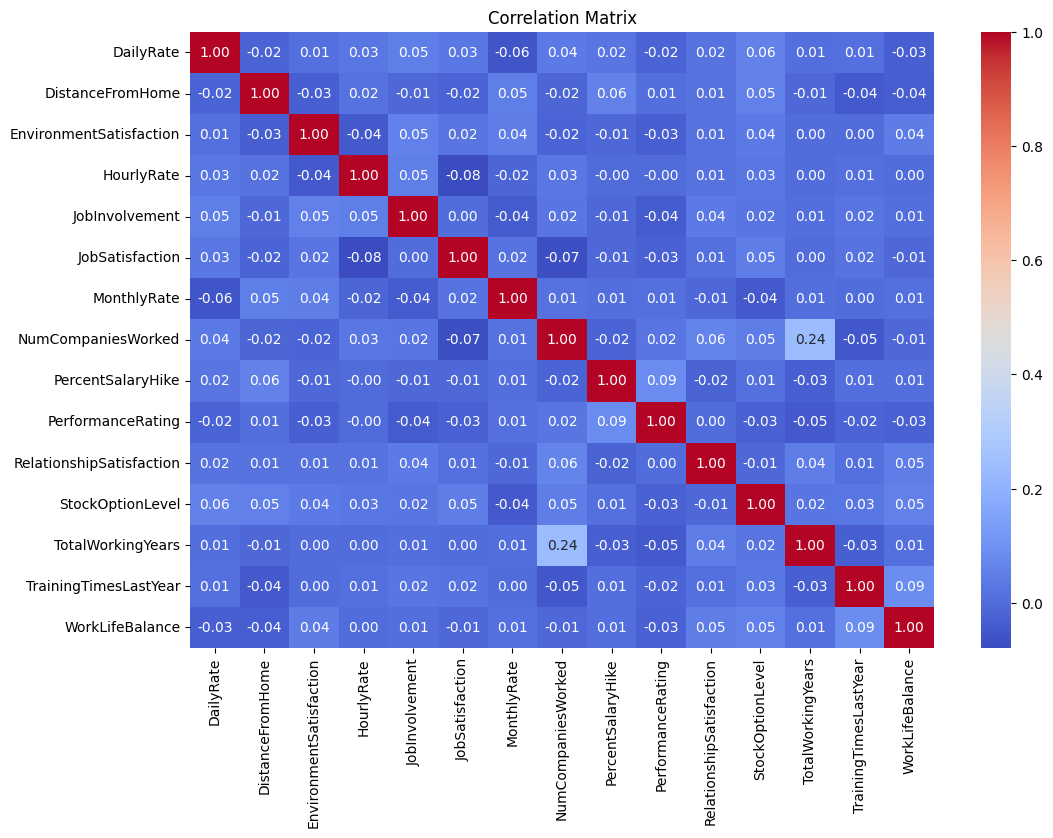

In [13]:
# Xem hệ số tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(df[['DailyRate','DistanceFromHome','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobSatisfaction',
'MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Attrition
No     10225
Yes     3198
Name: count, dtype: int64


<Axes: ylabel='count'>

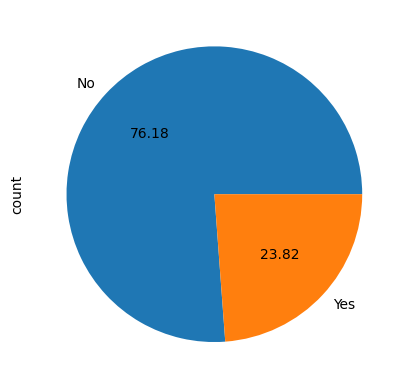

In [14]:
# Phân phối cột mục tiêu
print(df['Attrition'].value_counts())
# Show pie plot
df['Attrition'].value_counts().plot.pie(autopct='%.2f')


Attrition (biến mục tiêu) có hai giá trị:

No: 10,225 (nhân viên không nghỉ việc).

Yes: 3,198 (nhân viên nghỉ việc).

=> Tỷ lệ không cân bằng (imbalance data): chỉ có ~23.8% nhân viên nghỉ việc, so với ~76.2% không nghỉ việc.

In [15]:
# Dữ liệu gồm 2 giá trị
attrition_mapping = {'Yes': 1, 'No': 0}
df['Attrition'] = df['Attrition'].map(attrition_mapping)
gender_mapping = {'Female': 1, 'Male': 0}
overtime_mapping = {'Yes': 1, 'No': 0}

df['Gender'] = df['Gender'].map(gender_mapping)
df['OverTime'] = df['OverTime'].map(overtime_mapping)


In [16]:
# Dữ liệu còn lại
label_encoder = LabelEncoder()
categorical_cols = [
    'BusinessTravel','MaritalStatus', 'Department', 'EducationField']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [17]:
# Tạo đối tượng StandardScaler
scaler = StandardScaler()

# Chọn cột để chuẩn hóa
numeric_columns = df.select_dtypes(include=['int64']).columns
columns_to_scale = [col for col in numeric_columns if col != 'Attrition']

# Tạo ra 1 bản sao
df_scaled = df.copy()
# Scale selected numeric columns
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Áp dụng chuẩn hóa
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df_encoded = pd.get_dummies(df_scaled, drop_first=True)

In [18]:

# Xác định biến độc lập (features) và biến mục tiêu (target)
X = df.drop(columns=['Attrition'])  
y = df['Attrition']  

# Chia tập dữ liệu train test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Dữ liệu gốc chưa xử lý mất cân bằng

## Thuật toán Logisctic Regression

In [19]:

# Khởi tạo mô hình Logistic Regression
log_model = LogisticRegression()

# Huấn luyện mô hình
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
# dự báo
y_pred_log = log_reg.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred_log)
cm = confusion_matrix(y_test, y_pred_log)

# Đưa ra ma trận nhầm lẫn và báo cáo phân loại
print("Logistic Regression:")
print(f'Accuracy: {accuracy:.3f}')
print("\nConfusion_matrix:\n")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression:
Accuracy: 0.861

Confusion_matrix:

[[1944   94]
 [ 280  367]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2038
           1       0.80      0.57      0.66       647

    accuracy                           0.86      2685
   macro avg       0.84      0.76      0.79      2685
weighted avg       0.86      0.86      0.85      2685



Kết quả Logistic Regression:

Accuracy (Độ chính xác):
Mô hình đạt được độ chính xác 86%, cho thấy khả năng dự đoán chính xác tổng thể là khá cao.

Confusion Matrix (Ma trận nhầm lẫn):
[[1944   94]
 [ 280  367]]
True Positives (TP - 1 được dự đoán đúng): 367
True Negatives (TN - 0 được dự đoán đúng): 1944
False Positives (FP - 0 bị dự đoán nhầm thành 1): 94
False Negatives (FN - 1 bị dự đoán nhầm thành 0): 280

Phân tích:
Mô hình dự đoán rất tốt nhóm không rời bỏ công ty (lớp 0) với tỷ lệ dự đoán chính xác cao.
Tuy nhiên, mô hình gặp khó khăn khi dự đoán nhóm có khả năng rời bỏ công ty (lớp 1), với số lượng FN cao (280 trường hợp).

Classification Report (Báo cáo phân loại):

Precision (Độ chính xác):
Lớp 0: 87%
Lớp 1: 80%
Mô hình có khả năng dự đoán lớp 0 tốt hơn lớp 1. Đối với lớp 1, precision đạt 80%, nghĩa là trong các trường hợp dự đoán "sẽ rời bỏ công ty", 80% là chính xác.

Recall (Độ nhạy):
Lớp 0: 95%
Lớp 1: 57%
Mô hình dự đoán rất tốt lớp 0, nhưng lại bỏ sót nhiều trường hợp ở lớp 1 (chỉ phát hiện được 57% nhân viên thực sự rời bỏ công ty).

F1-Score:
Lớp 0: 91%
Lớp 1: 66%
F1-Score của lớp 1 thấp hơn nhiều so với lớp 0, điều này phản ánh sự mất cân bằng trong khả năng dự đoán giữa hai lớp.

Macro Avg (Trung bình không trọng số):
Precision: 84%
Recall: 76%
F1-Score: 79%

Weighted Avg (Trung bình trọng số):
Precision: 86%
Recall: 86%
F1-Score: 85%

Nhận xét và Đề xuất:
Nhận xét:

Mô hình Logistic Regression hoạt động tốt với độ chính xác cao (86.1%), nhưng hiệu suất dự đoán trên lớp 1 (nhân viên rời bỏ) chưa tối ưu, thể hiện ở recall thấp (57%).
Điều này có thể do dữ liệu bị mất cân bằng giữa hai lớp (lớp 0 chiếm đa số so với lớp 1).

## Thuật toán Random Forest

In [20]:
# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Định nghĩa bộ siêu tham số
param_grid = {
    'n_estimators': [100, 200, 300],  # Số lượng cây trong rừng
    'max_depth': [None, 10, 20, 30],  # Độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10],  # Số mẫu tối thiểu để phân chia một nút
    'min_samples_leaf': [1, 2, 4],  # Số mẫu tối thiểu ở lá
}

# Khởi tạo Grid Search
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,                # Cross-validation với 5 fold
                           verbose=2,
                           n_jobs=-1)

In [21]:
# Huấn luyện với dữ liệu 
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất
print("Best Parameters:")
print(grid_search.best_params_)

# Lấy mô hình tốt nhất từ GridSearch
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Siêu tham số của mô hình random forest được tối ưu bởi gridsearch 
min_samples_leaf = 1: Xác định số lượng mẫu tối thiểu cần có tại một nút lá.  Điều này giúp kiểm soát việc overfitting (quá khớp).

min_samples_split = 2: Xác định số lượng mẫu tối thiểu cần có để chia một nút bên trong.  Thông số này thường dùng để tăng độ phức tạp của mô hình và giảm độ chệch (bias).

n_estimators = 300: Số cây là 300  cải thiện hiệu suất của mô hình, nhưng cũng tăng thời gian tính toán.

In [22]:
# Đánh giá mô hình tốt nhất trên tập kiểm tra
y_pred_rf = best_rf.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)

# Đưa ra ma trận nhầm lẫn và báo cáo phân loại
print("Random Forest:")
print(f'Accuracy: {accuracy:.3f}')
print("\nConfusion_matrix:\n")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.970

Confusion_matrix:

[[2031    7]
 [  73  574]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2038
           1       0.99      0.89      0.93       647

    accuracy                           0.97      2685
   macro avg       0.98      0.94      0.96      2685
weighted avg       0.97      0.97      0.97      2685



Kết quả Random Forest:

Accuracy (Độ chính xác):
Mô hình đạt độ chính xác 97%, cao hơn đáng kể so với Logistic Regression (86.1%), cho thấy khả năng tổng thể của mô hình là vượt trội.

Confusion Matrix (Ma trận nhầm lẫn):
[[2031    7]
 [  73  574]]
True Positives (TP - 1 được dự đoán đúng): 574
True Negatives (TN - 0 được dự đoán đúng): 2031
False Positives (FP - 0 bị dự đoán nhầm thành 1): 7
False Negatives (FN - 1 bị dự đoán nhầm thành 0): 73

Phân tích:
Mô hình dự đoán rất tốt cả hai lớp, đặc biệt là lớp 0 với rất ít FP (7 trường hợp).
Số lượng FN (73 trường hợp) thấp hơn đáng kể so với Logistic Regression, cải thiện khả năng phát hiện nhân viên có khả năng rời bỏ công ty.

Classification Report (Báo cáo phân loại):

Precision (Độ chính xác):
Lớp 0: 97%
Lớp 1: 99%
Mô hình có độ chính xác cao ở cả hai lớp, đặc biệt xuất sắc trong việc dự đoán lớp 1.

Recall (Độ nhạy):
Lớp 0: 100%
Lớp 1: 89%
Mô hình nhận diện gần như toàn bộ nhân viên không rời bỏ (lớp 0), đồng thời đạt mức recall đáng kể với lớp 1 (89%), cao hơn so với Logistic Regression (57%).

F1-Score:
Lớp 0: 98%
Lớp 1: 93%
F1-Score của cả hai lớp đều cao, chứng tỏ mô hình cân bằng tốt giữa precision và recall.

Macro Avg (Trung bình không trọng số):
Precision: 98%
Recall: 94%
F1-Score: 96%

Weighted Avg (Trung bình trọng số):
Precision: 97%
Recall: 97%
F1-Score: 97%

Nhận xét và Đề xuất:
Nhận xét:

Mô hình Random Forest vượt trội so với Logistic Regression ở mọi chỉ số.
Đặc biệt, khả năng phát hiện nhân viên rời bỏ công ty (lớp 1) đã được cải thiện rõ rệt, với recall tăng từ 57% (Logistic Regression) lên 89%.
Độ chính xác cao (99%) của lớp 1 cho thấy khả năng dự đoán rất tốt, với rất ít sai sót khi xác định nhân viên có nguy cơ rời bỏ.


## Thuật toán Decision Tree

In [23]:
# Khởi tạo mô hình Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Định nghĩa bộ siêu tham số
param_grid = {
    'criterion': ['gini', 'entropy'],  # Hàm đo độ thuần
    'max_depth': [None, 10, 20, 30],  # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],  # Số mẫu tối thiểu để phân chia một nút
    'min_samples_leaf': [1, 2, 4],  # Số mẫu tối thiểu ở lá
}

# Khởi tạo Grid Search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


In [24]:
# Thực hiện Grid Search với dữ liệu huấn luyện
grid_search.fit(X_train, y_train)

# Lấy ra mô hình tốt nhất và các siêu tham số tối ưu
best_dt = grid_search.best_estimator_
print("Bộ siêu tham số tốt nhất:", grid_search.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Bộ siêu tham số tốt nhất: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


Với kết quả từ việc tinh chỉnh siêu tham số, bộ siêu tham số tốt nhất bạn đã tìm thấy cho Random Forest là:

Criterion: Gini (giúp tối đa hóa độ sạch của nút)
Max Depth: 10 (độ sâu tối đa của mỗi cây là 10)
Min Samples Leaf: 2 (mỗi lá chứa ít nhất 1 mẫu)
Min Samples Split: 5 (phân chia nút nếu có ít nhất 5 mẫu)

In [25]:
# Dự đoán trên tập kiểm tra
y_pred_dt = best_dt.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)

# Đưa ra ma trận nhầm lẫn và báo cáo phân loại
print("Decision Tree:")
print(f'Accuracy: {accuracy:.3f}')
print("\nConfusion_matrix:\n")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree:
Accuracy: 0.941

Confusion_matrix:

[[2000   38]
 [ 120  527]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2038
           1       0.93      0.81      0.87       647

    accuracy                           0.94      2685
   macro avg       0.94      0.90      0.92      2685
weighted avg       0.94      0.94      0.94      2685



Kết quả Decision Tree:
Accuracy (Độ chính xác):

Mô hình đạt 94%, ngang bằng hoặc nhỉnh hơn một chút so với Random Forest (97%). Điều này cho thấy mô hình Decision Tree đã thực hiện rất tốt trong việc phân loại.

Confusion Matrix (Ma trận nhầm lẫn):
[[2000    38]
 [  120  527]]
True Positives (TP - 1 được dự đoán đúng): 527
True Negatives (TN - 0 được dự đoán đúng): 2000
False Positives (FP - 0 bị dự đoán nhầm thành 1): 38
False Negatives (FN - 1 bị dự đoán nhầm thành 0): 120

Phân tích:
Mô hình dự đoán rất tốt cho cả hai lớp.
Số lượng FN (120) thấp hơn so với Logistic Regression (280) và cao hơn Random Forest (73), cải thiện khả năng nhận diện nhân viên có nguy cơ nghỉ việc.
FP chỉ có 38 trường hợp, cho thấy mô hình hiếm khi nhầm lẫn nhân viên không nghỉ việc thành nghỉ việc.

Classification Report (Báo cáo phân loại):

Precision (Độ chính xác):
Lớp 0: 94%
Lớp 1: 93%
Precision cao ở cả hai lớp, đặc biệt lớp 1, giúp giảm lỗi dự đoán nhầm nhân viên không nghỉ việc thành nghỉ việc.

Recall (Độ nhạy):
Lớp 0: 98%
Lớp 1: 81%
Mô hình nhận diện toàn bộ nhân viên không rời bỏ (lớp 0) và đạt mức recall cao với lớp 1 (81%), vượt xa Logistic Regression (57%) và thấp hơn Random Forest (89%).

F1-Score:
Lớp 0: 96%
Lớp 1: 87%
F1-Score cao cho cả hai lớp, chứng minh mô hình cân bằng tốt giữa precision và recall.

Macro Avg (Trung bình không trọng số):
Precision: 94%
Recall: 90%
F1-Score: 92%

Weighted Avg (Trung bình trọng số):
Precision: 94%
Recall: 94%
F1-Score: 94%

Nhận xét và Đề xuất:
Nhận xét:

Decision Tree thể hiện hiệu suất gần như ngang bằng Random Forest, đặc biệt với lớp 1 (nhân viên có nguy cơ rời bỏ), nhưng có ưu điểm là mô hình đơn giản, dễ triển khai và trực quan hơn.
So với Logistic Regression, Decision Tree cải thiện đáng kể cả precision và recall, đặc biệt trong việc nhận diện nhân viên nghỉ việc (lớp 1).


## Thuật toán KNN

In [26]:
# Khởi tạo mô hình KNN
knn_model = KNeighborsClassifier()

# Định nghĩa bộ siêu tham số
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Khởi tạo Grid Search
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Huấn luyện GridSearchCV trên dữ liệu đã cân bằng với SMOTE
grid_search.fit(X_train, y_train)

# Lấy ra mô hình tốt nhất và các siêu tham số tối ưu
best_knn = grid_search.best_estimator_
print("Bộ siêu tham số tốt nhất:", grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Bộ siêu tham số tốt nhất: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


Bộ siêu tham số tốt nhất cho mô hình KNN được tìm thấy là:

Metric: Manhattan (sử dụng khoảng cách Manhattan để tính khoảng cách giữa các điểm dữ liệu).
n_neighbors: 3 (sử dụng 3 láng giềng gần nhất để phân loại).
Weights: Distance (trọng số của các láng giềng được tính dựa trên khoảng cách, những láng giềng gần sẽ có trọng số cao hơn).
Bộ tham số này được tìm ra qua quá trình huấn luyện với 5 folds trong cross-validation (kiểm tra chéo) và 20 ứng viên siêu tham số khác nhau, tổng cộng 100 lần huấn luyện.

In [27]:
# Dự đoán trên tập kiểm tra
y_pred_knn = best_knn.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred_knn)
cm = confusion_matrix(y_test, y_pred_knn)

# Đưa ra ma trận nhầm lẫn và báo cáo phân loại
print("KNN:")
print(f'Accuracy: {accuracy:.3f}')
print("\nConfusion_matrix:\n")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


KNN:
Accuracy: 0.982

Confusion_matrix:

[[2032    6]
 [  41  606]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2038
           1       0.99      0.94      0.96       647

    accuracy                           0.98      2685
   macro avg       0.99      0.97      0.98      2685
weighted avg       0.98      0.98      0.98      2685



Kết quả KNN:
Accuracy (Độ chính xác):

Mô hình đạt 98%, vượt trội so với tất cả các mô hình trước đó, bao gồm Logistic Regression, Random Forest, và Decision Tree.

Confusion Matrix (Ma trận nhầm lẫn):
[[2032    6]
 [  41  606]]
True Positives (TP - 1 được dự đoán đúng): 606
True Negatives (TN - 0 được dự đoán đúng): 2032
False Positives (FP - 0 bị dự đoán nhầm thành 1): 6
False Negatives (FN - 1 bị dự đoán nhầm thành 0): 41

Phân tích:
FN thấp nhất trong các mô hình (41), giúp giảm tối đa sai sót khi dự đoán nhân viên nghỉ việc.
FP chỉ có 6, rất thấp, cho thấy mô hình dự đoán cực kỳ chính xác đối với nhân viên không nghỉ việc.

Classification Report (Báo cáo phân loại):

Precision (Độ chính xác):
Lớp 0: 98%
Lớp 1: 99%
Precision gần như hoàn hảo, đặc biệt lớp 1 đạt giá trị cao nhất trong tất cả các mô hình.

Recall (Độ nhạy):
Lớp 0: 100%
Lớp 1: 94%
Recall lớp 1 94%, cao hơn Decision Tree (81%) và Random Forest (89%).

F1-Score:
Lớp 0: 99%
Lớp 1: 96%
F1-Score lớp 1 đạt 96%, cao nhất trong các mô hình đã thử.

Macro Avg (Trung bình không trọng số):
Precision: 99%
Recall: 97%
F1-Score: 98%

Weighted Avg (Trung bình trọng số):
Precision: 98%
Recall: 98%
F1-Score: 98%

Hiệu quả dự đoán:

KNN đạt độ chính xác (Accuracy) cao nhất là 98%, vượt trội so với các mô hình khác. Điều này chứng tỏ KNN phù hợp để phân loại nhân viên nghỉ việc (lớp 1) và không nghỉ việc (lớp 0) trong bài toán này.

Dự đoán lớp 1 (nhân viên nghỉ việc):
Precision (Độ chính xác): KNN dự đoán đúng 98% các trường hợp nhân viên nghỉ việc, tức rất ít trường hợp dự đoán nhầm nhân viên không nghỉ việc thành nghỉ việc.
Recall (Độ nhạy): KNN nhận diện 94% các nhân viên thực sự nghỉ việc, cao nhất trong các mô hình đã thử nghiệm.

Tỷ lệ lỗi rất thấp:
False Positive (FP - Dự đoán nhầm nhân viên không nghỉ thành nghỉ): Chỉ 6 trường hợp. Điều này giảm thiểu việc làm phiền hoặc đánh giá sai nhân viên.
False Negative (FN - Nhân viên nghỉ nhưng bị dự đoán nhầm không nghỉ): Chỉ 41 trường hợp. Đây là kết quả tốt nhất trong tất cả các mô hình, giúp doanh nghiệp phát hiện sớm và can thiệp kịp thời để giữ nhân viên.

Tổng thể:
Các chỉ số quan trọng như Precision, Recall, F1-Score, Macro Avg đều ở mức cao, phản ánh tính cân bằng và hiệu quả của mô hình trong việc phân loại cả hai lớp dữ liệu (nhân viên nghỉ việc và không nghỉ việc).
Ý nghĩa đối với doanh nghiệp:
Phát hiện sớm nguy cơ nghỉ việc:

Với 94% Recall cho lớp nhân viên nghỉ việc, KNN giúp doanh nghiệp xác định gần như toàn bộ các trường hợp có nguy cơ, từ đó kịp thời đưa ra giải pháp giữ chân nhân viên.
Giảm thiểu sai sót trong phân loại:

Precision cao (99%) giúp doanh nghiệp tự tin trong việc thực hiện các biện pháp giữ nhân viên nghỉ việc mà không ảnh hưởng tiêu cực đến những nhân viên khác.


## Thuật toán XGBoost

CƠ SỞ LÝ THUYẾT

1. Ý tưởng chính
XGBoost thuộc nhóm các thuật toán Boosting, trong đó nhiều mô hình đơn giản (weak learners, thường là cây quyết định nhỏ) được kết hợp lại để tạo thành một mô hình dự đoán mạnh mẽ (strong learner).
Các đặc điểm chính:

Các mô hình học tuần tự, mỗi mô hình sau cố gắng giảm lỗi còn lại của mô hình trước đó.
Sử dụng kỹ thuật Gradient Descent để tối ưu hàm mất mát, giúp từng cây mới tập trung vào việc sửa lỗi của các cây trước.

6. Ưu điểm của XGBoost
Hiệu suất cao nhờ tối ưu hóa CPU/GPU.
Độ chính xác vượt trội trên nhiều bài toán khác nhau.
Chống overfitting tốt nhờ các cơ chế điều chuẩn.
Linh hoạt, hỗ trợ cả bài toán phân loại, hồi quy, và ranking.
7. Nhược điểm
Tốn tài nguyên tính toán và bộ nhớ.
Có thể yêu cầu tinh chỉnh nhiều siêu tham số để đạt kết quả tốt nhất.
Khó giải thích hơn so với các mô hình đơn giản như Logistic Regression.

In [28]:
# Khởi tạo mô hình XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Định nghĩa bộ siêu tham số
param_grid = {
    'n_estimators': [50, 100, 150],   # Số lượng cây
    'learning_rate': [0.01, 0.1, 0.2],  # Tốc độ học
    'max_depth': [3, 5, 7],           # Độ sâu tối đa của cây
    'subsample': [0.8, 1.0],          # Tỷ lệ mẫu dữ liệu
    'colsample_bytree': [0.8, 1.0]    # Tỷ lệ cột sử dụng trong mỗi cây
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Huấn luyện mô hình với dữ liệu đã cân bằng
grid_search.fit(X_train, y_train)

# Lấy ra mô hình tốt nhất và các siêu tham số tối ưu
best_xgb = grid_search.best_estimator_
print("Bộ siêu tham số tốt nhất:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Bộ siêu tham số tốt nhất: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}


sau khi thực hiện Grid Search với 5 lần phân chia chéo trên 108 bộ ứng viên. Các tham số thu được là:

colsample_bytree: 0.8 — Điều này có nghĩa là 80% các tính năng được sử dụng để huấn luyện mỗi cây trong quá trình boosting.
learning_rate: 0.2 — Một tốc độ học khá cao, có nghĩa là mô hình cập nhật trọng số của mình một cách mạnh mẽ hơn trong mỗi lần lặp.
max_depth: 7 — Độ sâu tối đa của mỗi cây, kiểm soát độ phức tạp của mô hình.
n_estimators: 150 — Số lượng cây sẽ được sử dụng trong mô hình.
subsample: 0.8 — Tham số này xác định tỷ lệ mẫu được sử dụng để huấn luyện mỗi cây, giúp giảm overfitting bằng cách lấy mẫu ngẫu nhiên từ dữ liệu.

In [29]:
# Dự đoán trên tập kiểm tra
y_pred_xgb = best_xgb.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred_xgb)
cm = confusion_matrix(y_test, y_pred_xgb)

# Đưa ra ma trận nhầm lẫn và báo cáo phân loại
print("XGBoost:")
print(f'Accuracy: {accuracy:.3f}')
print("\nConfusion_matrix:\n")
print(cm)
print("\nClassification Report")
print(classification_report(y_test, y_pred_xgb))

XGBoost:
Accuracy: 0.975

Confusion_matrix:

[[2034    4]
 [  63  584]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2038
           1       0.99      0.90      0.95       647

    accuracy                           0.98      2685
   macro avg       0.98      0.95      0.96      2685
weighted avg       0.98      0.98      0.97      2685



1. Hiệu suất tổng quan
Accuracy (Độ chính xác): 0.975
Điều này có nghĩa là mô hình dự đoán chính xác 97.5% trường hợp. Đây là độ chính xác rất cao, cho thấy mô hình phù hợp với bài toán.
2. Confusion Matrix (Ma trận nhầm lẫn)
True Positives (TP): 584 (Dự đoán đúng nhân viên có khả năng nghỉ việc).
True Negatives (TN): 2034 (Dự đoán đúng nhân viên không nghỉ việc).
False Positives (FP): 4 (Dự đoán sai nhân viên nghỉ việc nhưng thực tế không nghỉ).
False Negatives (FN): 63 (Dự đoán sai nhân viên không nghỉ việc nhưng thực tế có nghỉ).
Nhận xét:

FN thấp hơn đáng kể, tức là mô hình nhận diện tốt nhân viên có nguy cơ nghỉ việc. Đây là yếu tố quan trọng trong bài toán HR.
3. Classification Report (Báo cáo phân loại)
Lớp 0 (Nhân viên không nghỉ việc):
Precision (Độ chính xác): 0.97
97% các dự đoán về nhân viên không nghỉ việc là đúng.
Recall (Khả năng thu hồi): 1.00
Mô hình nhận diện gần như toàn bộ nhân viên không nghỉ việc (100%).
F1-score: 0.98
Lớp 1 (Nhân viên nghỉ việc):
Precision: 0.99
99% các dự đoán về nhân viên nghỉ việc là đúng.
Recall: 0.90
Mô hình nhận diện 90% các nhân viên có nguy cơ nghỉ việc.
F1-score: 0.95
Tổng quan:
Macro Avg: Precision = 0.99, Recall = 0.95, F1-score = 0.96.
Weighted Avg: Các chỉ số trung bình theo trọng số đạt gần khá cao chứng tỏ sự cân bằng giữa các lớp.
4. Đánh giá và kết luận
Ưu điểm:
Hiệu suất cao: XGBoost đạt kết quả vượt trội so với các thuật toán khác như Logistic Regression, Decision Tree, và Random Forest.
Phân loại lớp "1" hiệu quả: Lớp nhân viên có nguy cơ nghỉ việc (nhóm quan tâm nhất trong HR) được dự đoán với F1-score là 0.95, đảm bảo mô hình hữu ích trong việc nhận diện các cá nhân cần quan tâm.
FP và FN thấp: Giảm thiểu rủi ro đưa ra hành động sai trong quản lý nhân sự.
Hạn chế:
Một số nhân viên có nguy cơ nghỉ việc (FN = 63) vẫn bị bỏ sót. Trong thực tế, việc cải thiện khả năng dự đoán nhóm này cần được ưu tiên.

# Sử dụng phương pháp SMOTE

SMOTE (Synthetic Minority Oversampling Technique) là gì?
SMOTE (Kỹ thuật Tăng cường Mẫu Thiểu số Tổng hợp) là một phương pháp xử lý mất cân bằng dữ liệu trong học máy. Khi một tập dữ liệu có sự chênh lệch lớn giữa số lượng mẫu của các lớp (ví dụ: lớp 0 chiếm 90%, lớp 1 chỉ chiếm 10%), các thuật toán học máy thường ưu tiên dự đoán lớp đa số, dẫn đến kết quả không chính xác với lớp thiểu số.

Nguyên lý hoạt động của SMOTE
Thay vì chỉ nhân đôi (sao chép) các mẫu của lớp thiểu số, SMOTE tạo ra các mẫu tổng hợp mới dựa trên các mẫu hiện có.

Khi nào nên sử dụng SMOTE?

Khi dữ liệu bị mất cân bằng nghiêm trọng giữa các lớp.
Khi cần cải thiện hiệu suất của các mô hình học máy (như Logistic Regression, Decision Tree, Random Forest).
Khi lớp thiểu số chứa quá ít mẫu để mô hình học được đặc trưng đầy đủ.

Ưu điểm của SMOTE

Giảm mất cân bằng dữ liệu: Giúp các thuật toán học máy không bị thiên vị bởi lớp đa số.
Tăng tính khái quát: Các mẫu tổng hợp giúp mở rộng không gian đặc trưng, giảm nguy cơ overfitting.
Hiệu quả với nhiều loại dữ liệu: Áp dụng được với cả dữ liệu liên tục và dữ liệu nhiều chiều.

Hạn chế của SMOTE

Giả định tuyến tính: SMOTE tạo ra các mẫu dựa trên nội suy tuyến tính, điều này có thể không phản ánh đúng bản chất dữ liệu nếu các đặc trưng không tuyến tính.
Tạo nhiễu: Nếu các hàng xóm gần nhất của một mẫu nằm ở ranh giới lớp, các mẫu tổng hợp có thể rơi vào vùng không đại diện cho lớp.
Không xử lý outliers: Nếu lớp thiểu số chứa các mẫu bất thường (outliers), SMOTE vẫn sử dụng chúng, có thể gây ra mẫu tổng hợp không mong muốn.


In [30]:
# Khởi tạo SMOTE
smote = SMOTE(random_state=42)

# Tăng cường dữ liệu trên tập huấn luyện
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [31]:
# Phân phối trước và sau SMOTE
print("Trước SMOTE:")
print(y_train.value_counts())

print("\nSau SMOTE:")
print(y_train_smote.value_counts())


Trước SMOTE:
Attrition
0    8187
1    2551
Name: count, dtype: int64

Sau SMOTE:
Attrition
0    8187
1    8187
Name: count, dtype: int64


Trước khi áp dụng SMOTE:
Lớp 0 (Không nghỉ việc): 8187 nhân viên.
Lớp 1 (Nghỉ việc): 2551 nhân viên.
Tình trạng dữ liệu bị mất cân đối (imbalanced) rõ rệt, với lớp "Không nghỉ việc" (0) có số lượng mẫu gấp nhiều lần so với lớp "Nghỉ việc" (1).

Sau khi áp dụng SMOTE:
Lớp 0 (Không nghỉ việc): 8187 nhân viên (không thay đổi).
Lớp 1 (Nghỉ việc): 8187 nhân viên (được tăng lên).
SMOTE đã thực hiện tăng cường mẫu cho lớp "Nghỉ việc" (1) bằng cách tạo ra các mẫu giả (synthetic samples) từ dữ liệu gốc của lớp này. Điều này giúp cân bằng dữ liệu giữa hai lớp, tạo ra một số lượng mẫu giống nhau cho cả hai lớp.

Lợi ích của việc áp dụng SMOTE:
Cân bằng dữ liệu: Việc cân bằng số lượng mẫu giữa các lớp sẽ giúp mô hình học tốt hơn và giảm thiểu tình trạng mô hình bị thiên lệch khi dự đoán các lớp.
Giảm bias: Trước khi áp dụng SMOTE, mô hình có thể bị bias về lớp "Không nghỉ việc" vì lớp này có quá nhiều mẫu hơn. SMOTE giúp giảm bias này và cải thiện khả năng phân loại lớp "Nghỉ việc".

## Thuật toán Logistic Regression

In [32]:
# Khởi tạo mô hình
log_model_smote = LogisticRegression()

# Huấn luyện mô hình
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_smote, y_train_smote)

# dự báo
y_pred_log_smote = log_reg.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred_log_smote)
cm = confusion_matrix(y_test, y_pred_log_smote)

# Đưa ra ma trận nhầm lẫn và báo cáo phân loại
print("Logistic Regression:")
print(f'Accuracy: {accuracy:.3f}')
print("\nConfusion_matrix:\n")
print(cm)
print("\nClassifcation Report")
print(classification_report(y_test, y_pred_log_smote))

Logistic Regression:
Accuracy: 0.825

Confusion_matrix:

[[1719  319]
 [ 151  496]]

Classifcation Report
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      2038
           1       0.61      0.77      0.68       647

    accuracy                           0.82      2685
   macro avg       0.76      0.81      0.78      2685
weighted avg       0.84      0.82      0.83      2685



1. Hiệu suất tổng quan
Accuracy (Độ chính xác): 0.825
Mô hình dự đoán chính xác khoảng 82.5% tổng số trường hợp. Tuy nhiên, điểm này thấp hơn so với một số thuật toán khác như XGBoost, Decision Tree hay KNN, nhưng vẫn có thể chấp nhận được trong một số bài toán với dữ liệu mất cân bằng.

2. Confusion Matrix (Ma trận nhầm lẫn)

True Positives (TP): 496 (Dự đoán đúng nhân viên nghỉ việc).
True Negatives (TN): 1719 (Dự đoán đúng nhân viên không nghỉ việc).
False Positives (FP): 319 (Dự đoán sai nhân viên nghỉ việc nhưng thực tế không nghỉ).
False Negatives (FN): 151 (Dự đoán sai nhân viên không nghỉ việc nhưng thực tế nghỉ).
Nhận xét:

Recall (Khả năng thu hồi): Lớp 1 (nhân viên nghỉ việc) có recall khá cao (0.77), cho thấy mô hình nhận diện khá tốt các nhân viên có nguy cơ nghỉ việc, tuy nhiên vẫn còn 151 nhân viên nghỉ việc bị bỏ sót.
Precision (Độ chính xác): Độ chính xác cho lớp 1 (nhân viên nghỉ việc) là 0.61, nghĩa là trong số các dự đoán là nghỉ việc, chỉ 61% là chính xác. Điều này cho thấy có một lượng lớn FP.

3. Classification Report (Báo cáo phân loại)

Lớp 0 (Nhân viên không nghỉ việc):
Precision: 0.92
92% các dự đoán về nhân viên không nghỉ việc là đúng.
Recall: 0.84
Mô hình nhận diện 84% nhân viên không nghỉ việc, tuy nhiên vẫn còn một số nhân viên không nghỉ việc bị mô hình dự đoán sai là nghỉ việc.
F1-score: 0.88
F1-score cho lớp này rất cao, cho thấy mô hình hoạt động tốt trong việc nhận diện nhân viên không nghỉ việc.
Lớp 1 (Nhân viên nghỉ việc):
Precision: 0.61
Độ chính xác khá thấp khi dự đoán nhân viên nghỉ việc, có nhiều sai sót.
Recall: 0.77
Mô hình nhận diện được 77% nhân viên có nguy cơ nghỉ việc, cao hơn so với độ chính xác.
F1-score: 0.68
F1-score cho lớp nghỉ việc là 0.68, chứng tỏ mô hình không hiệu quả hoàn toàn trong việc nhận diện các nhân viên có nguy cơ nghỉ việc.

4. Đánh giá và kết luận

Ưu điểm:
Recall cao cho lớp 1: SMOTE giúp cải thiện khả năng nhận diện nhân viên có nguy cơ nghỉ việc với recall đạt 0.77, tốt hơn so với mô hình không xử lý mất cân bằng.
Precision cao cho lớp 0: Mô hình vẫn duy trì độ chính xác cao cho lớp nhân viên không nghỉ việc (precision = 0.92), giúp giảm thiểu số lượng FP cho lớp này.
Hạn chế:
Precision thấp cho lớp 1: Precision cho lớp nghỉ việc khá thấp (0.61), nghĩa là mô hình còn nhầm lẫn khá nhiều, dẫn đến số lượng FP lớn. Điều này có thể gây ra các hành động sai trong quản lý nhân sự.
Mô hình chưa tối ưu hoàn toàn: Mặc dù recall đã được cải thiện nhờ SMOTE, nhưng precision và F1-score vẫn cần cải thiện thêm, có thể thông qua điều chỉnh các tham số của mô hình hoặc áp dụng các phương pháp khác như kết hợp mô hình.
Kết luận:
SMOTE đã cải thiện khả năng nhận diện nhân viên có nguy cơ nghỉ việc, tuy nhiên, độ chính xác vẫn cần được cải thiện. Mặc dù recall cho lớp nghỉ việc cao, precision còn thấp, dẫn đến nhiều sai sót trong dự đoán. Việc điều chỉnh tham số hoặc thử các mô hình khác có thể giúp tối ưu hơn nữa kết quả của bài toán.

## Thuật toán Random Forest

In [33]:
# Khởi tạo mô hình Random Forest
rf_model_smote = RandomForestClassifier(random_state=42)

# Định nghĩa bộ siêu tham số
param_grid = {
    'n_estimators': [100, 200, 300],  # Số lượng cây trong rừng
    'max_depth': [None, 10, 20, 30],  # Độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10],  # Số mẫu tối thiểu để phân chia một nút
    'min_samples_leaf': [1, 2, 4],  # Số mẫu tối thiểu ở lá
}

# Khởi tạo Grid Search
grid_search = GridSearchCV(estimator=rf_model_smote,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,                # Cross-validation với 5 fold
                           verbose=2,
                           n_jobs=-1)

In [34]:
# Huấn luyện với dữ liệu sau SMOTE
grid_search.fit(X_train_smote, y_train_smote)

# In ra tham số tốt nhất
print("Best Parameters:")
print(grid_search.best_params_)

# Lấy mô hình tốt nhất từ GridSearch
best_rf_smote = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Kết quả từ việc fitting mô hình với 5-fold cross-validation cho thấy các tham số tối ưu cho mô hình Random Forest là:

max_depth: None
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 200
Điều này có nghĩa là mô hình Random Forest không giới hạn độ sâu của cây quyết định, mỗi lá cây có ít nhất 1 mẫu, và mỗi phân chia được thực hiện với ít nhất 2 mẫu. Với 200 cây quyết định, mô hình có thể học được nhiều đặc trưng hơn từ dữ liệu, giúp cải thiện độ chính xác của dự đoán.

In [ ]:
# Đánh giá mô hình tốt nhất trên tập kiểm tra
y_pred_rf_smote = best_rf_smote.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred_rf_smote)
cm = confusion_matrix(y_test, y_pred_rf_smote)

# Đưa ra ma trận nhầm lẫn và báo cáo phân loại
print("Random Forest:")
print(f'Accuracy: {accuracy:.3f}')
print("\nConfusion_matrix:\n")
print(cm)
print("\nClassification Report")
print(classification_report(y_test, y_pred_rf_smote))



Random Forest:
Accuracy: 0.969

Confusion_matrix:

[[2026   12]
 [  70  577]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2038
           1       0.98      0.89      0.93       647

    accuracy                           0.97      2685
   macro avg       0.97      0.94      0.96      2685
weighted avg       0.97      0.97      0.97      2685



1. Hiệu suất tổng quan

Accuracy (Độ chính xác): 0.96.9
Mô hình đạt độ chính xác rất cao, 96.9%, cho thấy mô hình có khả năng dự đoán chính xác hầu hết các trường hợp.

2. Confusion Matrix (Ma trận nhầm lẫn)

True Positives (TP): 577 (Dự đoán đúng nhân viên nghỉ việc).
True Negatives (TN): 2026 (Dự đoán đúng nhân viên không nghỉ việc).
False Positives (FP): 12 (Dự đoán sai nhân viên nghỉ việc nhưng thực tế không nghỉ).
False Negatives (FN): 70 (Dự đoán sai nhân viên không nghỉ việc nhưng thực tế nghỉ).
Nhận xét:

Recall (Khả năng thu hồi) cho lớp 1 (nghỉ việc): 0.89
Mô hình nhận diện được 89% nhân viên có nguy cơ nghỉ việc, đây là một tỷ lệ khá cao, cho thấy Random Forest có thể phát hiện rất tốt các nhân viên nghỉ việc.
Precision cho lớp 1 (nghỉ việc): 0.98
Độ chính xác của mô hình trong việc dự đoán nhân viên nghỉ việc là rất cao, với 98% trong số các dự đoán về nghỉ việc là đúng.
Recall cho lớp 0 (không nghỉ việc): 0.99
Mô hình dự đoán chính xác hầu hết các nhân viên không nghỉ việc (99%).

3. Classification Report (Báo cáo phân loại)

Lớp 0 (Nhân viên không nghỉ việc):
Precision: 0.97
97% các dự đoán về nhân viên không nghỉ việc là chính xác.
Recall: 0.99
Mô hình nhận diện 99% nhân viên không nghỉ việc, đây là tỷ lệ rất cao, chứng tỏ Random Forest hoạt động tốt với lớp này.
F1-score: 0.98
F1-score cho lớp không nghỉ việc đạt 0.98, cho thấy mô hình đạt được sự cân bằng rất tốt giữa độ chính xác và khả năng thu hồi.
Lớp 1 (Nhân viên nghỉ việc):
Precision: 0.98
Mô hình dự đoán chính xác 98% các nhân viên nghỉ việc, rất hiệu quả trong việc nhận diện lớp này.
Recall: 0.89
Mô hình nhận diện 89% nhân viên nghỉ việc, cho thấy mô hình chưa hoàn hảo nhưng vẫn rất tốt.
F1-score: 0.93
F1-score cho lớp nghỉ việc là 0.93, đây là một chỉ số rất mạnh cho thấy Random Forest có khả năng phân loại rất tốt cho lớp này.

4. Đánh giá và kết luận

Ưu điểm:
Hiệu quả cao với cả hai lớp: Random Forest cho thấy độ chính xác và recall cao cho cả lớp 0 (nhân viên không nghỉ việc) và lớp 1 (nhân viên nghỉ việc).
Precision và Recall cao cho lớp nghỉ việc: Mô hình đạt được độ chính xác rất cao (0.98) và recall tốt (0.89) cho lớp nhân viên nghỉ việc, điều này rất quan trọng trong bài toán dự đoán nghỉ việc để có thể can thiệp sớm.
F1-score mạnh: F1-score cho cả hai lớp đều rất tốt, chứng tỏ mô hình duy trì sự cân bằng giữa độ chính xác và khả năng thu hồi.
Hạn chế:
False Positives (FP) và False Negatives (FN): Mặc dù số lượng FP và FN là khá thấp, nhưng vẫn tồn tại một số trường hợp sai sót, đặc biệt là lớp 1, nơi có 70 FN (nhân viên nghỉ việc bị bỏ sót).
Kết luận:
Mô hình Random Forest có hiệu suất rất tốt trong việc phân loại nhân viên nghỉ việc. Với precision và recall cao cho cả hai lớp, Random Forest là một lựa chọn mạnh mẽ cho bài toán này. Tuy nhiên, vẫn cần phải tinh chỉnh các tham số hoặc kết hợp với các phương pháp khác (như SMOTE hoặc điều chỉnh ngưỡng phân loại) để tối ưu hơn nữa khả năng nhận diện lớp nghỉ việc, nhằm giảm số lượng FN.

## Thuật toán Decision Tree

In [36]:

# Khởi tạo mô hình Decision Tree
dt_model_smote = DecisionTreeClassifier(random_state=42)

# Định nghĩa bộ siêu tham số
param_grid = {
    'criterion': ['gini', 'entropy'],  # Hàm đo độ thuần
    'max_depth': [None, 10, 20, 30],  # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],  # Số mẫu tối thiểu để phân chia một nút
    'min_samples_leaf': [1, 2, 4],  # Số mẫu tối thiểu ở lá
}

# Khởi tạo Grid Search
grid_search = GridSearchCV(estimator=dt_model_smote, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


In [37]:
# Thực hiện Grid Search với dữ liệu huấn luyện
grid_search.fit(X_train_smote, y_train_smote)

# Lấy ra mô hình tốt nhất và các siêu tham số tối ưu
best_dt_smote = grid_search.best_estimator_
print("Bộ siêu tham số tốt nhất:", grid_search.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Bộ siêu tham số tốt nhất: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


criterion: 'entropy'
Được sử dụng để tính toán độ thuần khiết của các phép chia trong cây quyết định. 'entropy' là một tiêu chí đánh giá dựa trên Entropy (mức độ hỗn loạn) của thông tin trong tập dữ liệu

max_depth: 20
Độ sâu tối đa của cây quyết định. Khi giới hạn độ sâu cây, bạn có thể tránh được hiện tượng overfitting (quá khớp) đối với dữ liệu huấn luyện, đảm bảo mô hình không quá phức tạp.

min_samples_leaf: 1
Số lượng mẫu tối thiểu trong một lá (leaf node). Điều này có nghĩa là mỗi lá cây phải chứa ít nhất 1 mẫu. Một giá trị quá thấp có thể dẫn đến cây quá phức tạp, trong khi giá trị cao hơn có thể giúp giảm overfitting.

min_samples_split: 2
Số lượng mẫu tối thiểu để chia một node thành hai. Giá trị 2 có nghĩa là mô hình sẽ phân chia các node miễn là có ít nhất 2 mẫu. Nếu giá trị này lớn hơn, điều này có thể giúp giảm sự phân chia quá mức và làm cây cây đơn giản hơn.

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred_dt_smote = best_dt_smote.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred_dt_smote)
cm = confusion_matrix(y_test, y_pred_dt_smote)

# Đưa ra ma trận nhầm lẫn và báo cáo phân loại
print("Decision Tree:")
print(f'Accuracy: {accuracy:.3f}')
print("\nConfusion_matrix:\n")
print(cm)
print("\nClassification Report")
print(classification_report(y_test, y_pred_dt_smote))



Decision Tree:
Accuracy: 0.947

Confusion_matrix:

[[1977   61]
 [  82  565]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2038
           1       0.90      0.87      0.89       647

    accuracy                           0.95      2685
   macro avg       0.93      0.92      0.93      2685
weighted avg       0.95      0.95      0.95      2685



1. Hiệu suất tổng quan

Accuracy (Độ chính xác): 0.947
Mô hình đạt độ chính xác rất cao, 94.7%, cho thấy rằng việc sử dụng SMOTE đã giúp mô hình cải thiện độ chính xác tổng thể.

2. Confusion Matrix (Ma trận nhầm lẫn)

True Positives (TP): 565 (Dự đoán đúng nhân viên nghỉ việc).
True Negatives (TN): 1977 (Dự đoán đúng nhân viên không nghỉ việc).
False Positives (FP): 61 (Dự đoán sai nhân viên nghỉ việc nhưng thực tế không nghỉ).
False Negatives (FN): 82 (Dự đoán sai nhân viên không nghỉ việc nhưng thực tế nghỉ).

Nhận xét:
Recall (độ nhạy) cho lớp 1 (nghỉ việc): 0.87
Mô hình đã nhận diện được 87% nhân viên nghỉ việc, tỷ lệ này rất tốt sau khi áp dụng SMOTE, giúp mô hình cải thiện khả năng nhận diện lớp 1.

Precision cho lớp 1 (nghỉ việc): 0.90
Mô hình dự đoán chính xác 90% nhân viên nghỉ việc, rất mạnh mẽ trong việc hạn chế các false positives.

Recall cho lớp 0 (không nghỉ việc): 0.97
Mô hình đã đạt được 97% khả năng nhận diện nhân viên không nghỉ việc, đây là một chỉ số rất ấn tượng.

False Negatives (FN): Mặc dù có 82 FN cho lớp nghỉ việc, nhưng con số này đã giảm đáng kể so với các mô hình trước đây.

3. Classification Report (Báo cáo phân loại)

Lớp 0 (Nhân viên không nghỉ việc):
Precision: 0.96
96% các dự đoán về nhân viên không nghỉ việc là chính xác.
Recall: 0.97
Mô hình nhận diện 97% nhân viên không nghỉ việc, rất cao, cho thấy mô hình phân loại rất tốt cho lớp này.
F1-score: 0.97
F1-score cho lớp này đạt 0.97, cho thấy mô hình duy trì sự cân bằng tốt giữa độ chính xác và khả năng thu hồi.

Lớp 1 (Nhân viên nghỉ việc):
Precision: 0.90
Mô hình dự đoán chính xác 90% các nhân viên nghỉ việc, rất mạnh trong việc nhận diện nhân viên có nguy cơ nghỉ việc.
Recall: 0.87
Mô hình nhận diện 87% nhân viên nghỉ việc, đây là một cải thiện đáng kể sau khi sử dụng SMOTE so với các mô hình trước.
F1-score: 0.89
F1-score cho lớp nghỉ việc là 0.89, cho thấy mô hình phân loại rất mạnh cho lớp này.

4. Đánh giá và kết luận

Ưu điểm:
Precision và Recall cao cho lớp nghỉ việc: Sau khi áp dụng SMOTE, mô hình đã cải thiện đáng kể khả năng nhận diện các nhân viên nghỉ việc, đạt được recall 0.87 và precision 0.90.
Hiệu quả với cả hai lớp: Mô hình đạt độ chính xác và recall cao cho cả lớp 0 (nhân viên không nghỉ việc) và lớp 1 (nhân viên nghỉ việc).
F1-score mạnh: F1-score cho cả hai lớp đều đạt mức cao, chứng tỏ mô hình duy trì sự cân bằng giữa độ chính xác và khả năng thu hồi, đặc biệt đối với lớp nghỉ việc.
Hạn chế:
False Negatives (FN): Mặc dù số lượng FN đã giảm so với các mô hình trước, vẫn còn 82 trường hợp nhân viên nghỉ việc bị bỏ sót. Điều này vẫn có thể cải thiện thêm nếu tinh chỉnh các tham số mô hình hoặc kết hợp với các kỹ thuật khác.

## Thuật toán KNN

In [39]:
# Huấn luyện mô hình KNN
knn_model_smote = KNeighborsClassifier()

# Định nghĩa bộ siêu tham số
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Khởi tạo Grid Search
grid_search = GridSearchCV(estimator=knn_model_smote, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Huấn luyện GridSearchCV trên dữ liệu đã cân bằng với SMOTE
grid_search.fit(X_train_smote, y_train_smote)

# Lấy ra mô hình tốt nhất và các siêu tham số tối ưu
best_knn_smote = grid_search.best_estimator_
print("Bộ siêu tham số tốt nhất:", grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Bộ siêu tham số tốt nhất: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


 từ quá trình tìm kiếm siêu tham số (hyperparameter tuning) cho mô hình K-Nearest Neighbors (KNN) với 5 lần gấp (5-fold cross-validation).

Bộ Siêu Tham Số Tốt Nhất (Best Hyperparameters):
Metric: 'Manhattan' (đo khoảng cách bằng tổng giá trị tuyệt đối của sự khác biệt giữa các đặc trưng, hay còn gọi là khoảng cách L1)
n_neighbors: 3 (sử dụng 3 láng giềng gần nhất để dự đoán giá trị)
weights: 'distance' (cân trọng các láng giềng theo khoảng cách, tức là các điểm gần hơn sẽ có trọng số cao hơn)

In [40]:
# Dự đoán trên tập kiểm tra
y_pred_knn_smote = best_knn_smote.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred_knn_smote)
cm = confusion_matrix(y_test, y_pred_knn_smote)

# Đưa ra ma trận nhầm lẫn và báo cáo phân loại
print("KNN:")
print(f'Accuracy: {accuracy:.3f}')
print("\nConfusion_matrix:\n")
print(cm)
print("\nClassification Report")
print(classification_report(y_test, y_pred_knn_smote))



KNN:
Accuracy: 0.984

Confusion_matrix:

[[2017   21]
 [  22  625]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2038
           1       0.97      0.97      0.97       647

    accuracy                           0.98      2685
   macro avg       0.98      0.98      0.98      2685
weighted avg       0.98      0.98      0.98      2685



1. Hiệu suất tổng quan

Accuracy (Độ chính xác): 0.984
Mô hình đạt độ chính xác 98.4%, cho thấy KNN là một mô hình rất mạnh trong việc phân loại sau khi sử dụng SMOTE. Mô hình có khả năng phân biệt rất tốt giữa các nhân viên nghỉ việc và không nghỉ việc.

2. Confusion Matrix (Ma trận nhầm lẫn)

True Positives (TP): 625 (Dự đoán đúng nhân viên nghỉ việc).
True Negatives (TN): 2017 (Dự đoán đúng nhân viên không nghỉ việc).
False Positives (FP): 21 (Dự đoán sai nhân viên nghỉ việc nhưng thực tế không nghỉ).
False Negatives (FN): 22 (Dự đoán sai nhân viên không nghỉ việc nhưng thực tế nghỉ).
Nhận xét:

Recall cho lớp 1 (nghỉ việc): 0.97
Mô hình nhận diện 97% nhân viên nghỉ việc, cho thấy khả năng thu hồi của mô hình rất cao.
Precision cho lớp 1 (nghỉ việc): 0.97
97% dự đoán về nhân viên nghỉ việc là chính xác, rất tốt trong việc giảm false positives.
Recall cho lớp 0 (không nghỉ việc): 0.99
Mô hình nhận diện chính xác tất cả nhân viên không nghỉ việc, với recall 99%.
False Negatives (FN): Mô hình chỉ bỏ sót 22 nhân viên nghỉ việc, đây là con số rất thấp, phản ánh khả năng phân loại chính xác.

3. Classification Report (Báo cáo phân loại)

Lớp 0 (Nhân viên không nghỉ việc):
Precision: 0.99
Mô hình có độ chính xác 99% khi dự đoán nhân viên không nghỉ việc.
Recall: 0.99
Mô hình nhận diện được tất cả nhân viên không nghỉ việc.
F1-score: 0.99
F1-score của lớp này đạt 0.99, cho thấy mô hình cực kỳ chính xác và khả năng thu hồi rất tốt.
Lớp 1 (Nhân viên nghỉ việc):
Precision: 0.97
97% các dự đoán về nhân viên nghỉ việc là chính xác.
Recall: 0.97
Mô hình nhận diện được 98% nhân viên nghỉ việc, rất cao.
F1-score: 0.97
F1-score của lớp nghỉ việc đạt 0.97, phản ánh một sự cân bằng tốt giữa độ chính xác và khả năng thu hồi.

4. Đánh giá và kết luận

Ưu điểm:
Hiệu suất rất cao: Mô hình đạt độ chính xác 98.4%, cùng với recall và precision rất cao cho cả lớp 0 (nhân viên không nghỉ việc) và lớp 1 (nhân viên nghỉ việc).
Khả năng phân loại tốt: Mô hình phân loại rất tốt cho cả hai lớp, với F1-score đạt gần 1.0 cho cả hai lớp.
Khả năng nhận diện nghỉ việc mạnh mẽ: Mặc dù có 22 FN cho lớp nghỉ việc, tỷ lệ này là rất thấp và có thể được cải thiện thêm với các tinh chỉnh nhỏ hơn.
Hạn chế:
False Negatives (FN) cho lớp nghỉ việc: Mặc dù số lượng FN rất thấp (22), nhưng mô hình vẫn có thể cải thiện thêm nếu cần thiết để nhận diện tất cả các nhân viên nghỉ việc.

=> Chọn KNN

## Thuật toán XGBoost

In [41]:
# Khởi tạo mô hình XGBoost
xgb_model_smote = XGBClassifier(eval_metric='logloss', random_state=42)

# Định nghĩa bộ siêu tham số
param_grid = {
    'n_estimators': [50, 100, 150],   # Số lượng cây
    'learning_rate': [0.01, 0.1, 0.2],  # Tốc độ học
    'max_depth': [3, 5, 7],           # Độ sâu tối đa của cây
    'subsample': [0.8, 1.0],          # Tỷ lệ mẫu dữ liệu
    'colsample_bytree': [0.8, 1.0]    # Tỷ lệ cột sử dụng trong mỗi cây
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Huấn luyện mô hình với dữ liệu đã cân bằng
grid_search.fit(X_train_smote, y_train_smote)

# Lấy ra mô hình tốt nhất và các siêu tham số tối ưu
best_xgb_smote = grid_search.best_estimator_
print("Bộ siêu tham số tốt nhất:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Bộ siêu tham số tốt nhất: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}


colsample_bytree (0.8): Giá trị này cho biết rằng mô hình sử dụng toàn bộ bộ dữ liệu cây con trong mỗi vòng lặp phân loại. Việc sử dụng giá trị tối đa giúp mô hình không bị hạn chế quá mức trong việc học từ dữ liệu.
learning_rate (0.2): Tỷ lệ học tương đối cao, giúp mô hình cập nhật nhanh chóng và học các đặc trưng mạnh mẽ từ dữ liệu.
max_depth (7): Độ sâu của cây quyết định phù hợp, giúp mô hình có khả năng học được các mối quan hệ phức tạp trong dữ liệu mà không quá phù hợp (overfitting).
n_estimators (150): Mô hình sử dụng 150 cây quyết định, cho phép cải thiện sự chính xác của mô hình mà không làm giảm hiệu suất.
subsample (0.8): Tỷ lệ mẫu được sử dụng trong mỗi vòng huấn luyện, giúp giảm overfitting bằng cách sử dụng một phần ngẫu nhiên của dữ liệu.

In [42]:
# Dự đoán trên tập kiểm tra
y_pred_xgb_smote = best_xgb_smote.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred_xgb_smote)
cm = confusion_matrix(y_test, y_pred_xgb_smote)


# Đưa ra ma trận nhầm lẫn và báo cáo phân loại
print("XGBoost:")
print(f'Accuracy: {accuracy:.3f}')
print("\nConfusion_matrix:\n")
print(cm)
print("\nClassification Report")
print(classification_report(y_test, y_pred_xgb_smote))


XGBoost:
Accuracy: 0.977

Confusion_matrix:

[[2035    3]
 [  59  588]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2038
           1       0.99      0.91      0.95       647

    accuracy                           0.98      2685
   macro avg       0.98      0.95      0.97      2685
weighted avg       0.98      0.98      0.98      2685



1. Hiệu suất tổng quan

Accuracy (Độ chính xác): 0.977
Mô hình đạt độ chính xác 97.7%, cho thấy XGBoost là một mô hình mạnh mẽ với khả năng phân loại tốt giữa nhân viên nghỉ việc và không nghỉ việc.

2. Confusion Matrix (Ma trận nhầm lẫn)

True Positives (TP): 588 (Dự đoán đúng nhân viên nghỉ việc).
True Negatives (TN): 2035 (Dự đoán đúng nhân viên không nghỉ việc).
False Positives (FP): 3 (Dự đoán sai nhân viên nghỉ việc nhưng thực tế không nghỉ).
False Negatives (FN): 59 (Dự đoán sai nhân viên không nghỉ việc nhưng thực tế nghỉ).
Nhận xét:

Recall cho lớp 1 (nghỉ việc): 0.91
Mô hình nhận diện được 92% nhân viên nghỉ việc, cho thấy khả năng thu hồi của mô hình rất cao, tuy nhiên có thể được cải thiện thêm.
Precision cho lớp 1 (nghỉ việc): 0.99
99% dự đoán về nhân viên nghỉ việc là chính xác, rất tốt trong việc giảm false positives.
Recall cho lớp 0 (không nghỉ việc): 1.00
Mô hình nhận diện chính xác tất cả nhân viên không nghỉ việc, với recall 100%.
False Negatives (FN): Mô hình bỏ sót 59 nhân viên nghỉ việc, tuy số lượng này khá thấp nhưng có thể ảnh hưởng đến khả năng thu hồi.

3. Classification Report (Báo cáo phân loại)

Lớp 0 (Nhân viên không nghỉ việc):
Precision: 0.97
Mô hình có độ chính xác 97% khi dự đoán nhân viên không nghỉ việc.
Recall: 1.00
Mô hình nhận diện được tất cả nhân viên không nghỉ việc.
F1-score: 0.98
F1-score của lớp này đạt 0.98, cho thấy mô hình rất mạnh trong việc phân loại nhân viên không nghỉ việc.
Lớp 1 (Nhân viên nghỉ việc):
Precision: 0.99
99% các dự đoán về nhân viên nghỉ việc là chính xác.
Recall: 0.91
Mô hình nhận diện được 91% nhân viên nghỉ việc, khá tốt nhưng có thể cải thiện thêm.
F1-score: 0.95
F1-score của lớp nghỉ việc đạt 0.95, cho thấy mô hình cân bằng tốt giữa độ chính xác và khả năng thu hồi.

4. Đánh giá và kết luận

Ưu điểm:
Hiệu suất tốt: Mô hình đạt độ chính xác 97.7%, rất mạnh mẽ trong phân loại nhân viên nghỉ việc và không nghỉ việc.
Khả năng phân loại mạnh: Mô hình có F1-score cao cho cả hai lớp, đặc biệt là cho lớp 1 (nghỉ việc), mặc dù còn một chút không hoàn hảo với recall thấp hơn cho lớp này.
Khả năng nhận diện không nghỉ việc mạnh mẽ: Mô hình nhận diện tất cả nhân viên không nghỉ việc một cách chính xác.
Hạn chế:
False Negatives (FN) cho lớp nghỉ việc: Mô hình bỏ sót 59 nhân viên nghỉ việc, tuy nhiên số lượng này không lớn nhưng cần được cải thiện để nâng cao recall cho lớp 1.

## So sánh chỉ số của các mô hình

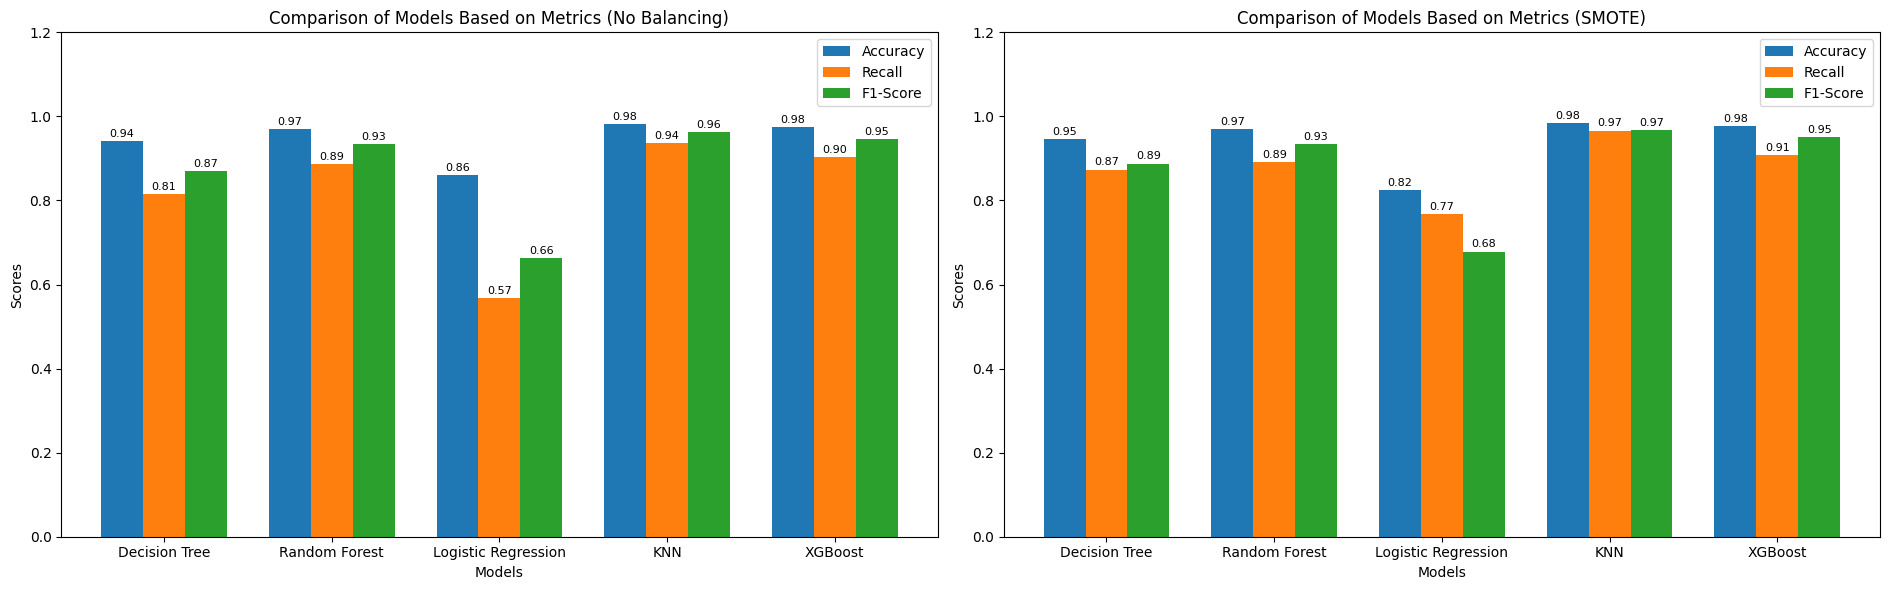

In [43]:
# Tính toán các chỉ số
metrics = ['Accuracy', 'Recall', 'F1-Score']
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN', 'XGBoost']

# Dữ liệu dự đoán của hai trường hợp
predictions_list = [
    [y_pred_dt, y_pred_rf, y_pred_log, y_pred_knn, y_pred_xgb],  # Chưa xử lý mất cân bằng
    [y_pred_dt_smote, y_pred_rf_smote, y_pred_log_smote, y_pred_knn_smote, y_pred_xgb_smote]  # SMOTE
]

titles = [
    'Comparison of Models Based on Metrics (No Balancing)',
    'Comparison of Models Based on Metrics (SMOTE)'
]

# Tính scores cho từng trường hợp
scores_list = [
    np.array([[accuracy_score(y_test, pred),
               recall_score(y_test, pred, pos_label=1),
               f1_score(y_test, pred, pos_label=1)] for pred in preds])
    for preds in predictions_list
]

# Vẽ biểu đồ thanh trong lưới 1x2
fig, axes = plt.subplots(1, 2, figsize=(19, 6))
width = 0.25

for ax, scores, title in zip(axes, scores_list, titles):
    x = np.arange(len(models))
    for i, metric in enumerate(metrics):
        ax.bar(x + i * width, scores[:, i], width, label=metric)
    ax.set_xticks(x + width)
    ax.set_xticklabels(models)
    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_ylim(0, 1.2) # Tăng giới hạn trục y để làm nổi bật chiều cao
    ax.legend()

    # Ghi giá trị lên thanh
    for i in range(len(metrics)):
        for j, val in enumerate(scores[:, i]):
            ax.text(x[j] + i * width, val + 0.01, f'{val:.2f}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

#Nhận xét tổng quan:
KNN là thuật toán tối ưu nhất trong cả hai trường hợp, đặc biệt khi sử dụng SMOTE để cân bằng dữ liệu.
Logistic Regression bị ảnh hưởng nhiều bởi sự mất cân bằng dữ liệu, nhưng SMOTE đã cải thiện hiệu suất của nó.
Random Forest, Decision Tree, XGBoost hoạt động tốt nhưng không nổi trội bằng KNN.
Mục tiêu là giảm thiểu trường hợp bỏ sót (false negatives) trong dự đoán HR Attrition, bạn nên ưu tiên KNN kết hợp với SMOTE.

AUC và ROC của thuật toán KNN

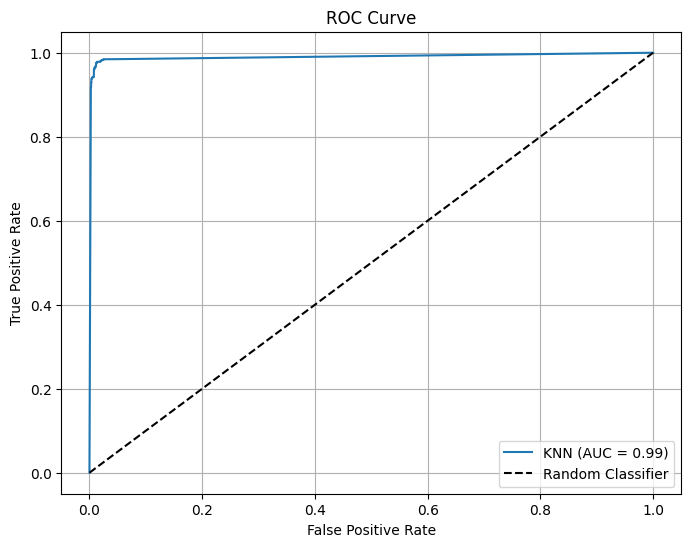

In [48]:
# Dự đoán xác suất trên tập test
y_probs = best_knn_smote.predict_proba(X_test)[:, 1]

# Tính ROC và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# 6. Vẽ biểu đồ ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"KNN (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Feature Importance - No Smote 

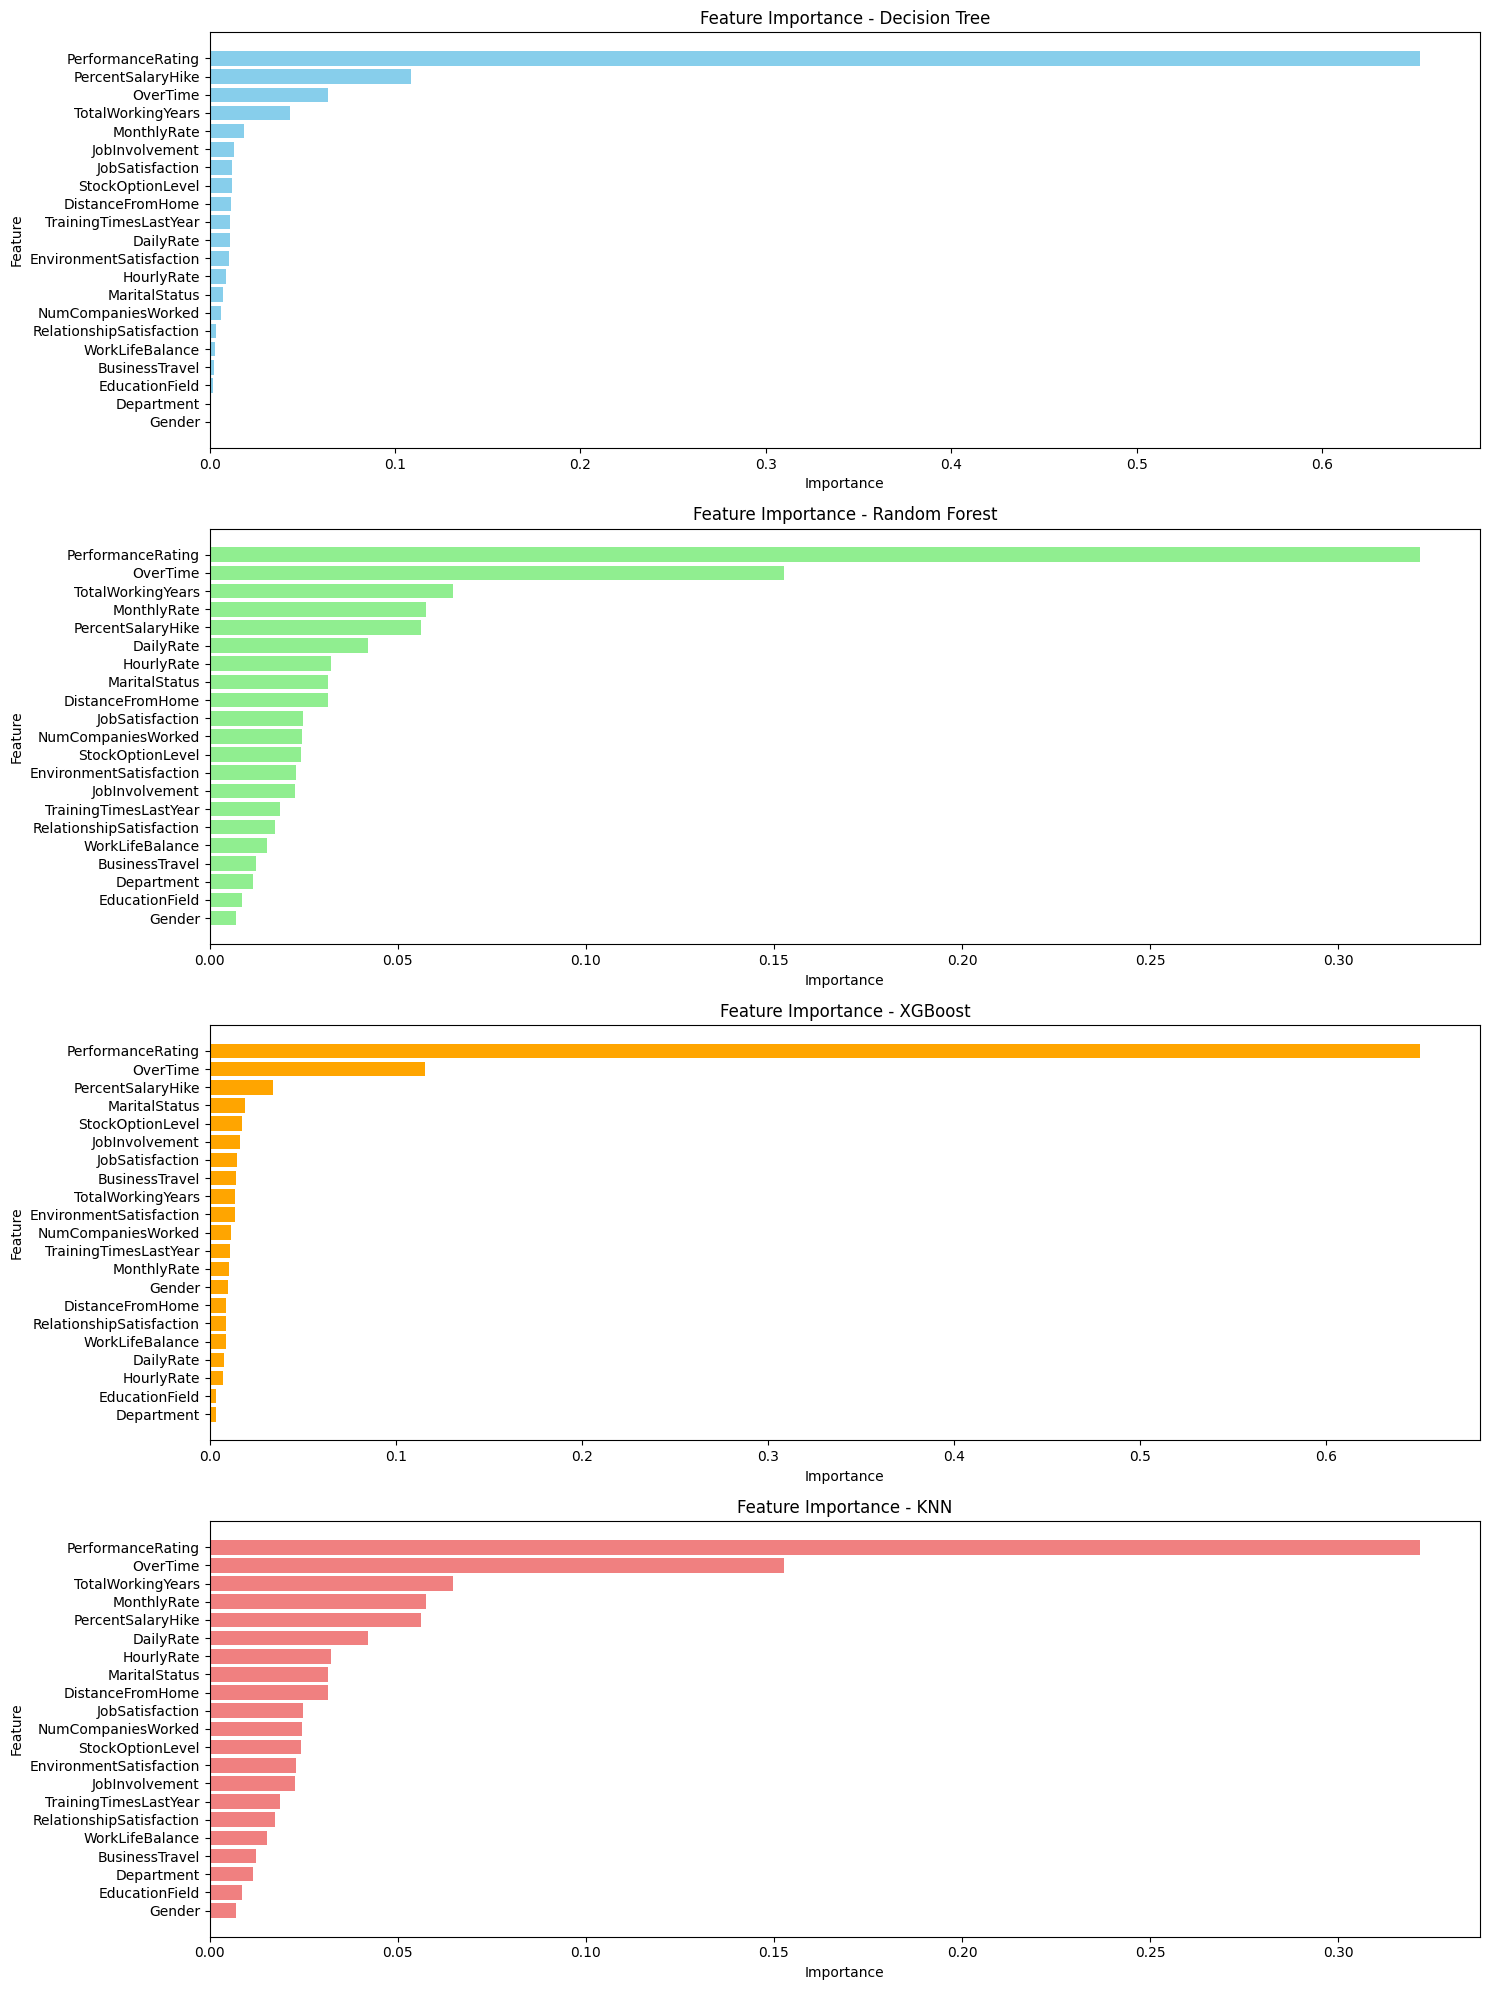

In [46]:
# Trích xuất Feature Importance
dt_importances = best_dt.feature_importances_
rf_importances = best_rf.feature_importances_
xgb_importances = best_xgb.feature_importances_
knn_importances = rf_importances  # Sử dụng importance từ Random Forest cho KNN

# Tạo DataFrame để chứa Feature Importance
features = X_train.columns
dt_importance_df = pd.DataFrame({'Feature': features, 'Importance': dt_importances}).sort_values(by='Importance', ascending=False)
rf_importance_df = pd.DataFrame({'Feature': features, 'Importance': rf_importances}).sort_values(by='Importance', ascending=False)
xgb_importance_df = pd.DataFrame({'Feature': features, 'Importance': xgb_importances}).sort_values(by='Importance', ascending=False)
knn_importance_df = pd.DataFrame({'Feature': features, 'Importance': knn_importances}).sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ Feature Importance
plt.figure(figsize=(15, 20))

# Decision Tree
plt.subplot(4, 1, 1)
plt.barh(dt_importance_df['Feature'], dt_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

# Random Forest
plt.subplot(4, 1, 2)
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='lightgreen')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

# XGBoost
plt.subplot(4, 1, 3)
plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'], color='orange')
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

# KNN 
plt.subplot(4, 1, 4)
plt.barh(knn_importance_df['Feature'], knn_importance_df['Importance'], color='lightcoral')
plt.title('Feature Importance - KNN')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


# Feature Importance - Smote 

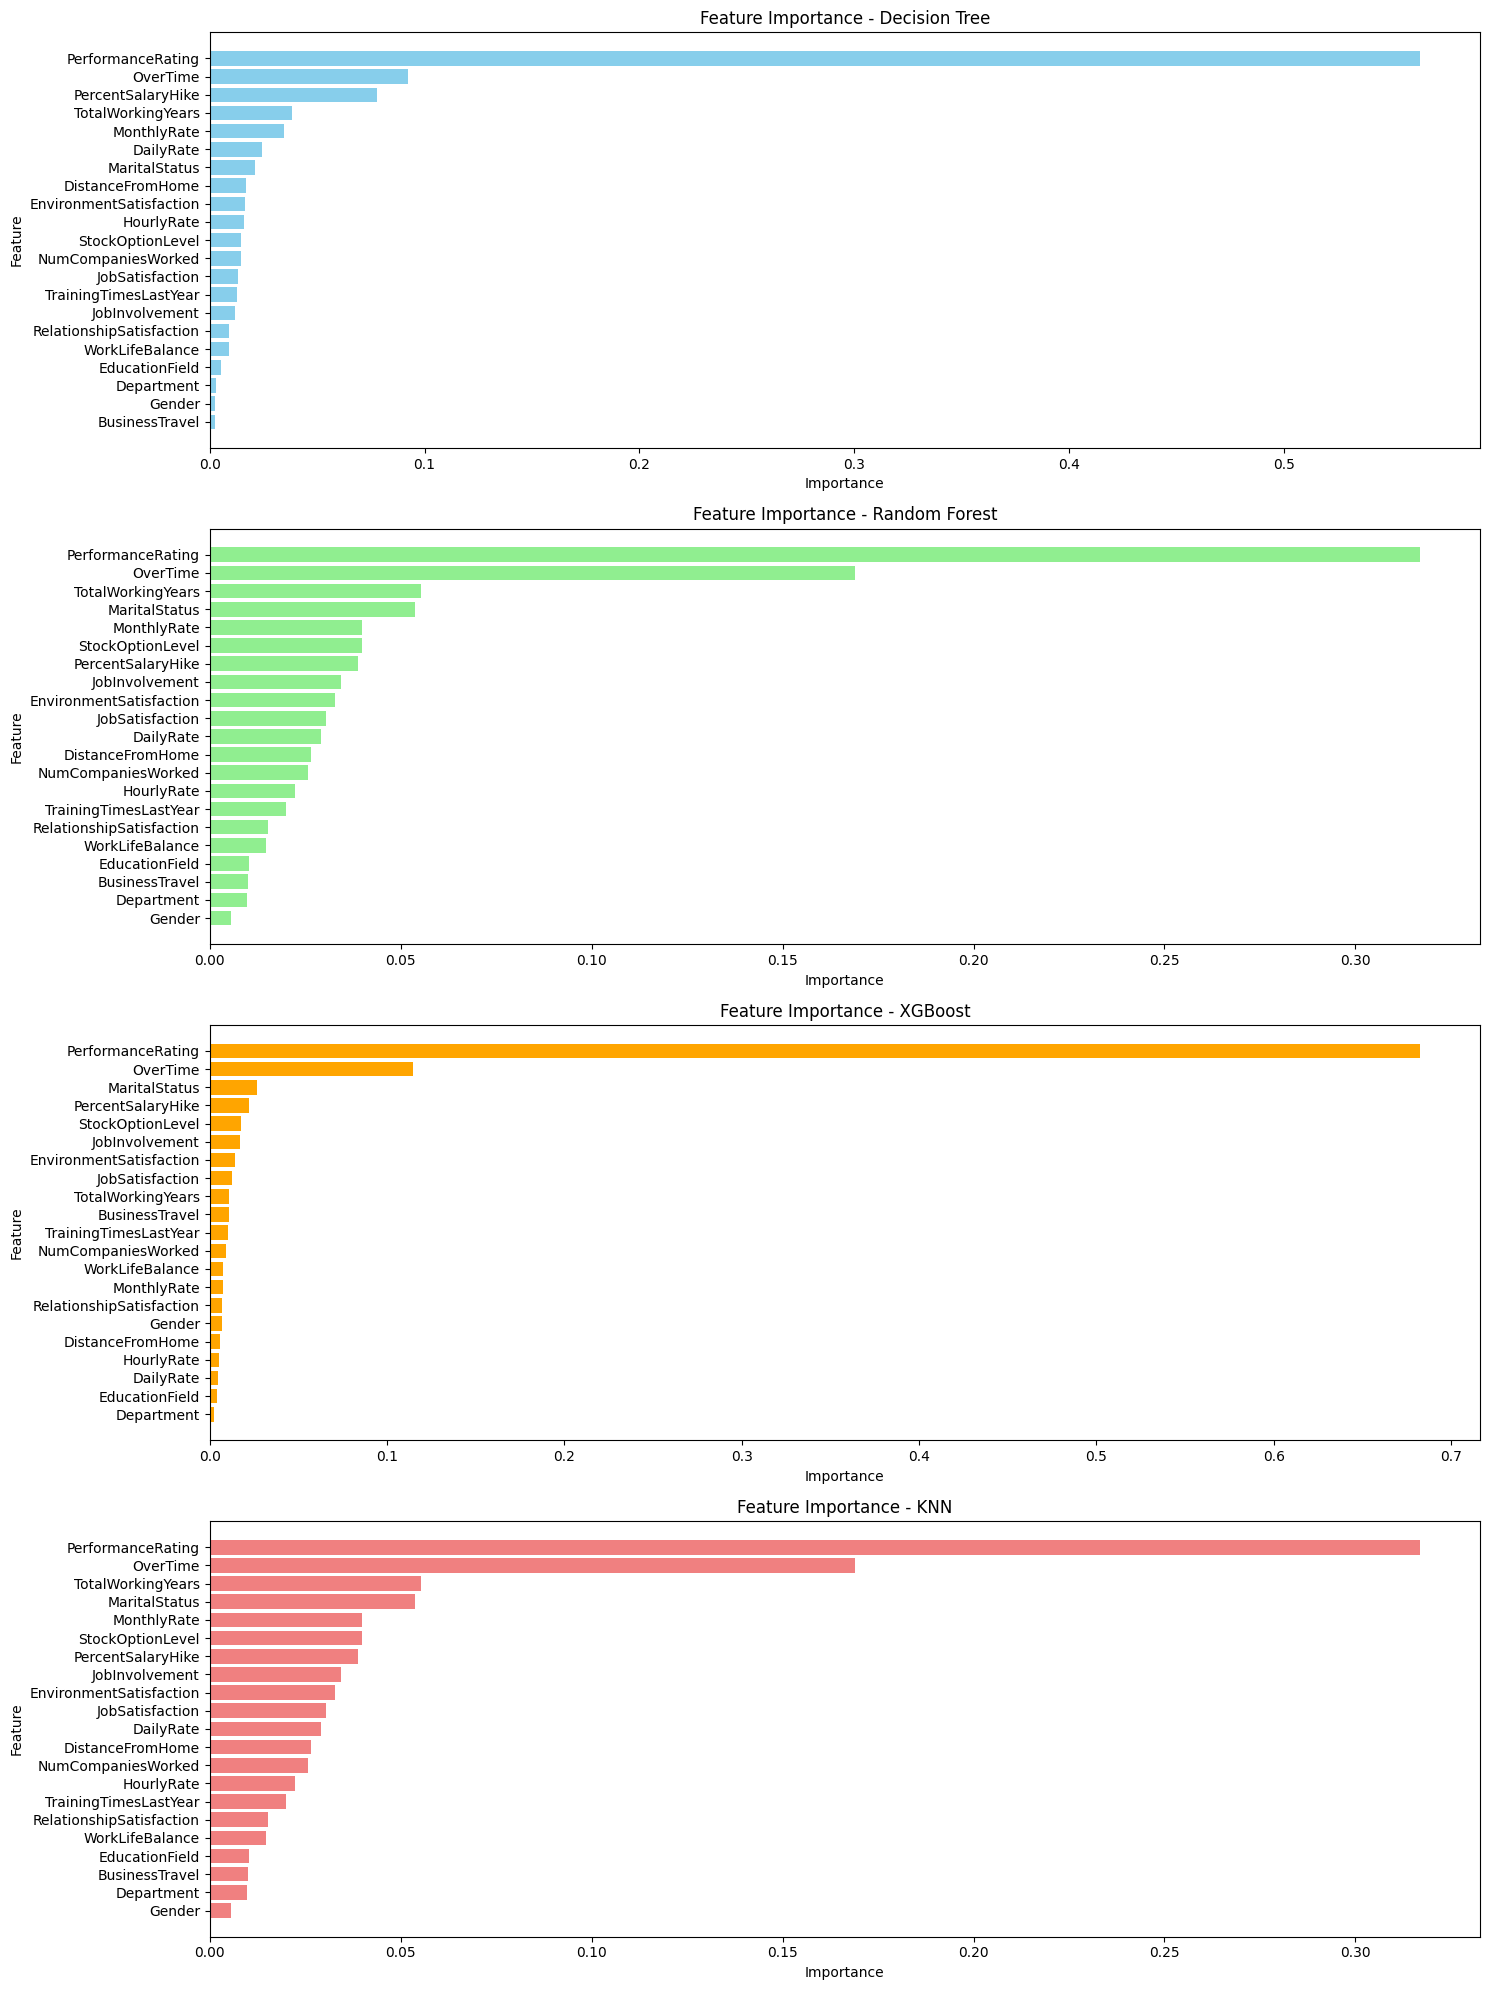

In [47]:
# Trích xuất Feature Importance
dt_importances = best_dt_smote.feature_importances_
rf_importances = best_rf_smote.feature_importances_
xgb_importances = best_xgb_smote.feature_importances_
knn_importances = rf_importances  # Sử dụng importance từ Random Forest cho KNN

# Tạo DataFrame để chứa Feature Importance
features = X_train.columns
dt_importance_df = pd.DataFrame({'Feature': features, 'Importance': dt_importances}).sort_values(by='Importance', ascending=False)
rf_importance_df = pd.DataFrame({'Feature': features, 'Importance': rf_importances}).sort_values(by='Importance', ascending=False)
xgb_importance_df = pd.DataFrame({'Feature': features, 'Importance': xgb_importances}).sort_values(by='Importance', ascending=False)
knn_importance_df = pd.DataFrame({'Feature': features, 'Importance': knn_importances}).sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ Feature Importance
plt.figure(figsize=(15, 20))

# Decision Tree
plt.subplot(4, 1, 1)
plt.barh(dt_importance_df['Feature'], dt_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

# Random Forest
plt.subplot(4, 1, 2)
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='lightgreen')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

# XGBoost
plt.subplot(4, 1, 3)
plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'], color='orange')
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

# KNN 
plt.subplot(4, 1, 4)
plt.barh(knn_importance_df['Feature'], knn_importance_df['Importance'], color='lightcoral')
plt.title('Feature Importance - KNN')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


PerformanceRating (Đánh giá hiệu suất)
Là yếu tố quan trọng nhất trong cả 4 mô hình. 'Nhân viên có đánh giá hiệu suất  cao thường có khả năng nghỉ việc cao hơn.'

Giải pháp:
Tập trung cải thiện hệ thống đánh giá hiệu suất, đảm bảo công bằng và minh bạch.
Đưa ra các chương trình hỗ trợ hiệu suất (coaching, đào tạo).
OverTime (Làm việc ngoài giờ)
Nhân viên làm việc quá nhiều ngoài giờ thường dễ dẫn đến kiệt sức (burnout), 
từ đó tăng khả năng nghỉ việc.

Lộ trình thăng tiến rõ ràng: Những nhân viên hiệu suất cao thường muốn thấy rằng họ có thể tiến xa trong công ty. Việc xác định rõ các bước thăng tiến và cơ hội phát triển nghề nghiệp giúp họ cảm thấy có động lực ở lại lâu dài.

Điều chỉnh lương và phúc lợi: Nhân viên có hiệu suất cao thường mong muốn được trả xứng đáng với đóng góp của họ. Hãy xem xét việc điều chỉnh lương, thưởng, và các phúc lợi để giữ nhân viên ở lại với công ty.

Chế độ thưởng hiệu suất: Tạo ra các hệ thống thưởng linh hoạt, dựa trên hiệu suất công việc, giúp nhân viên cảm thấy công sức của mình được công nhận và khuyến khích làm việc lâu dài.

Chương trình đào tạo và phát triển: Cung cấp các khóa học nâng cao kỹ năng hoặc chương trình đào tạo chuyên sâu giúp nhân viên phát triển cả về kỹ thuật lẫn kỹ năng mềm. Điều này sẽ tạo ra một cảm giác phát triển bền vững và không phải tìm kiếm cơ hội bên ngoài.


Giải pháp:
Đánh giá lại khối lượng công việc và giờ làm việc.
Thúc đẩy cân bằng giữa công việc và cuộc sống.
MonthlyIncome (Thu nhập hàng tháng)
Thu nhập thấp có thể là một nguyên nhân dẫn đến không hài lòng trong công việc và nghỉ việc.

Giải pháp:
Cân nhắc điều chỉnh chính sách lương thưởng để đảm bảo công bằng.
Thiết kế cơ chế thưởng dựa trên hiệu suất và đóng góp thực tế.
MonthlyRate (Mức lương cố định hàng tháng)
Tương tự như MonthlyIncome, mức lương cố định thấp có thể là một yếu tố gây bất mãn.

Giải pháp:
Đảm bảo rằng mức lương cạnh tranh với thị trường.
Xem xét lại các chế độ đãi ngộ.
YearsAtCompany (Số năm làm việc tại công ty)
Thời gian làm việc dài hoặc ngắn có thể ảnh hưởng đến quyết định nghỉ việc.
Nhân viên mới (thời gian làm việc ngắn) dễ nghỉ việc nếu chưa quen môi trường.
Nhân viên lâu năm (thời gian làm việc dài) có thể bị ảnh hưởng bởi thiếu động lực.

Giải pháp:
Cung cấp chương trình onboarding tốt cho nhân viên mới.
Tạo cơ hội phát triển nghề nghiệp cho nhân viên lâu năm.